# WNBA Player Statistics and Their Average Salaries
# COGS 108 - Final Project

Video: https://youtu.be/FncdIPNN_R4
# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* ['X'] YES - make available
* [] NO - keep private

# Names

- David Wang
- David Zhao
- James Streett
- Jonathan Yip
- Sebastian Finch

# Abstract

We first developed this project to help us to analyze what attributes are most important to WNBA players' salary, and the reason for doing so because we wanted to get a sense of what area that players should work on so that they will be favorable to the recruiits. Our project is done through 4 major process, web scraping data sets, an EDA analysis on different attributes to obtain a general relationship between players' attributes and their salaries, a linear regression model to find what attributes are significant and lastly, creating different macine learning models to predict players' salaries with known attributes. Our conclusion was that minutes played, amount of points a player scored, turn-over-rate, steal rate, true-shooting-rate and assists rate are the siginifcant factors in preidcitng a WNBA player's salary and the conclusion is rather reasonable because above attributes could very well to be used to interpret a players effectivness on the field, though the discussion on their effectivness is for another day. 

# Research Question

Analyzing the WNBA player market value requires a comprehensive study that takes into account factors such as player performance, marketability, team needs, and the overall economic landscape of the league, making it a multifaceted and dynamic research endeavor. It is with our project that we wanted to research what factors and player attributes are most influential in predicting WNBA player free agency contract values? What methods are best for analyzing WNBA player market value?



## Background and Prior Work

In our project, we are going to be looking at what factors play into a WNBA player’s contract. We will be looking into various in-game statistics such as shooting efficiency (true shooting%), volume scoring (PPG), and minutes played (MP) as well as biographical factors such as age, draft capital, and height. We wanted to know if there was a positive correlation between any of these factors to get a better gauge of what teams should look for when signing free-agency contracts with players.

In our research, we are drawing inspiration from Gabriel Pastorello's study on predicting NBA salaries with machine learning(1), as well as Sarah Tidwell's exploration of WNBA player salaries(2). Pastorello's research identified key in-game statistics like minutes per game (MP), points per game (PPG), and total points as influential factors in determining NBA player salaries (1). However, it fell short in addressing biographical factors, which the current project aims to rectify by considering variables such as age, draft capital, and height in the analysis of WNBA player contracts.

Sarah Tidwell's work provides a comparative framework between the WNBA and NBA, offering valuable insights into the earnings of WNBA players, particularly rookies and the highest-paid athletes. This comparison allows for a broader perspective and potential cross-referencing of results between the two leagues (2).

It is with our research that we demonstrate an awareness of potential threats to validity by acknowledging the limitations of Pastorello's study and addressing the need to fill the gap in understanding biographical factors. We want to try and maintain a balance between theoretical insights and empirical findings, reinforcing the credibility and rigor of the research.

Links:
1. ^ Pastorello, G. (24 Aug 2023) Predicting NBA Salaries with Machine Learning. Medium. https://towardsdatascience.com/predicting-nba-salaries-with-machine-learning-ed68b6f75566
2. ^ Tidwell, S. (10 Apr 2023) WNBA salary, contracts: How much money do women’s basketball players make? Sporting News https://www.sportingnews.com/us/wnba/news/wnba-salaries-2023-rookies-compared-nba/aaz024nlakdbvi0x91rfoir7 

# Hypothesis


### Factors: Biographical
We expect biographical factors such as age, draft capital, and height to have more predictive value than commonly used per-game metrics (points per game, rebounds per game, etc.) as teams assess player value in terms of expected *future* performance rather than current performance—while a proven veteran player may have performed better historically, the young prospect will often have more future success. 

### Factors: Basketball Metrics
Of the commonly used basketball statistics, we predict player shooting efficiency (true shooting%), volume scoring (PPG), and minutes played (MP) to have the greatest predictive value. Minutes played (MP) may appear to be a value heavily dependent on the player’s previous team, nonetheless, we anticipate it to be valuable in approximating a variety of less tangible player skills such as defense and leadership—generally, a player earns their time spent on the court even if it is not always reflected in the box score. 

However, to assess productivity independently from opportunity, we’ll transform many of these statistics to values relative to time spent on the court (scoring%, assist%, rebound%). Single-number player impact metrics such as VORP and BPM may be useful as *(debatably)* proven estimates of player performance.

### Performance of Models
While a simple regression model may provide decent estimates, we expect a more complex model (either a neural network or gradient boost model) to perform far better on test data as it could capture the many complex relationships between different statistics (i.e. many stats may be expected to improve with age while others are expected to decline).


# Data

## Data overview (changes made to TA issues)

### The Ideal Dataset

An ideal dataset would contain all relevant player stats (basic and advanced) from the past two to three seasons, as well as biographical information (height, age, etc) and contract data from the seasons before and after free agency. The contract info should include notable factors such as exceptions and status (restricted vs unrestricted free agents). Ideally, this data would be in tabular format to easily be manipulated with pandas.

### Limiting Confounders and Variabilities

To limit variability and avoid significant outliers, we'll only evaluate players with contracts signed in free agency as rookie contracts generally do not accurately reflect player value as they're set in stone prior to the draft. We'll also conduct analysis regarding only a player's *first* free agent contract as it enables us to disgard age and various contract exceptions.

### Real Datasets

We expect to pull most of our data from three separate sources:

- [stats.wnba.com](https://stats.wnba.com/) | The go-to option for finding basic information about the players, per-game statistics, and some advanced stats. This data set includes all of basic stats about players in WNBA, we chose the values from year 2019-2022 because those years contain player stats before they are signed. The data sets have about 750 observations and 20+ attribute columns. In addition, we have included bios in each player's statistics to get more information about the player, this is done through stats.wnba.com as well by scraping each player's profile. The data that are obtained from scraping each player's bios then is merged with the original stat data set to includes following statistics about each player:
    - `year` | The year of player's data.
  - `player` | The player's name.
  - `team` | The player's team
  - `age` | The player's age
  - `gp` | amount of games player played
  - `w` | amount of wins player have
  - `l` | amount of losses player have
  - `min` | minutes that the player played
  - `pts` | total points the player has scored
  - `fgm` | field goals made by the player
  - `fga` | field goals attempted by the player
  - `fgp` | field goals made percentage by the player
  - `3pm` | 3 points made by the player
  - `3pa` | 3 points attempted by the player
  - `3pp` | 3 points made percentage
  - `ftm` | free throws made by the player
  - `fta` | free throws attempted by the player
  - `ftp` | free throws percentage of the player
  - `oreb` | offensive rebounds  made by the player
  - `dreb` | defensive rebounds  made by the player
  - `reb` | total rebound  of the player
  - `ast` | assists made by the player
  - `tov` | turn over made by the player
  - `stl` | steal made by the player
  - `blk` | block made by the player
  - `pf` | personal fouls
  - `fp` | fantasy points
  - `dd2` | double doubles
  - `td3` | triple doubles 
  - `pm` | player's rank in current year
  - `height` | player's height
  - `weight` | player's weight
  - `oreb_rate` | offensive rebounds rate
  - `dreb_rate` | defensive rebounds rate
  - `usage_rate` | how often player is involved in offense
  - `true_shooting` | player's scoring efficiency 
  - `ast_rate` | player's assists rate
 


- [spotrac](https://www.spotrac.com/wnba/free-agents/2020/) | Our source for contract data, which spans from 2011 to now with about 30-40 signed free agents per season. Can also be used to find the player's past earning and salaries. We will likely normalize these values relatively to league's salary cap for each season. (e.g. 200k might be 50% of a team’s max allowed salary in 2010 but 15% in 2020). However, this data contains not a lot of observations, around 120 rows of usable data with 10 attribute columns, and since the website requires purchase for data before 2020, we are only limited to year 2020-2023 for contract data. The data set contains following columns:


  - `year` | The year of free agency.
  - `player` | The player's name.
  - `pos` | The player's position (guard, forward, or center).
  - `num` | The player's jersey number.
  - `fa_type` | The free agency type. There are 3 types
    - `ERFA` | Exclusive rights free agent (player cannot sign with another team).
    - `RFA` | Restricted free agent (previous team can match contract offer and keep player).
    - `UFA` | Unrestricted free agent (the player can sign wherever).
  - `prev_team` | The player's old team (before free agency).
  - `new_team` | The team that signed the player.
  - `years` | The length of the contract in years.
  - `avg_salary` | The average yearly salary of the contract.
  - `next_cap_hit` | The players impact on team cap space for the upcoming season (next season salary + relevant bonuses).

The data sources will all require web-scraping, however, with some data manipulation and cleaning, we should be able to compile a collection of observations resembling our ideal dataset.

### Siginificant Statistics from Data Set

Since we want to draw correlation between player's attributes with its contract salary, we will be monitor every statistics that we could get from the player and run regression analysis on each attributes. Therefore, there are no variables from data sets that are dropped. 

### Data Cleaning and Wrangling process

The data that we obtained from scraping with spotrac.com is rather clean, but with stats.wnba.com, since we used an automation webscraping method (due to website has dynamic content that are produced by java script), our data is not as clean as we expected. Therefore, we had to format strings in each column to make them into a tidy and readable format. For both data sets, we dropped any missing values that we could find and since we want both datasets to line up, we will only choose player who appeared in both data sets. Therefore, we merged both data sets together and dropped any player who we couldn't find corresponding statistics on stats.wnba.com. 


In [1]:
# Imports for cleaning
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from time import sleep
import nest_asyncio

from selenium import webdriver 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By

pd.options.mode.chained_assignment = None

In [2]:
import sys
print(sys.version)

3.8.9 (tags/v3.8.9:a743f81, Apr  6 2021, 14:02:34) [MSC v.1928 64 bit (AMD64)]


In [3]:
# Helper functions
def clean_string(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('\n', '').str.strip()
    return df

def clean_float(df, cols):
    for col in cols:
        df[col] = (
            df[col].astype(str)
            .str.replace('\n', '')
            .str.replace('$', '')
            .str.replace('%', '')
            .str.replace(',', '')
            .str.strip()
            .astype(float))
    return df
def clean_money(x):
    x = x.replace('$', '').replace(',', '')
    return float(x.strip())

## Dataset: Spotrac

In [4]:
# Code to scrape the spotrac site seasons 2020-2023
contracts = []
for year in range(2020, 2024):
    # pull contract data from each year 2020-2023
    contracts_url = f'https://www.spotrac.com/wnba/free-agents/{year}/'
    request = requests.get(contracts_url)
    
    soup = BeautifulSoup(request.content)
    
    # find table
    body = soup.find_all('tbody')[0]
    for tr in body.find_all('tr'):
        # loop through rows and add data to rows
        data = tr.find_all('td')
        player = data[0].text
        pos = data[1].text
        num = data[2].text
        fa_type = data[3].text
        prev_team = data[4].text
        new_team = data[5].text
        years = data[6].text
        avg_salary = data[7].text
        next_season_cap_hit = data[8].text

        contracts.append([year, player, pos, num, fa_type, prev_team, new_team,
                         years, avg_salary, next_season_cap_hit])

    sleep(2)

In [5]:
# create dataframe
free_agents = pd.DataFrame(contracts)
free_agents.columns = ['year', 'player', 'pos', 'num', 'fa_type', 'prev_team', 'new_team', 'years', 'avg_salary', 'next_cap_hit']

In [6]:
free_agents['years'].value_counts()

-      324
1       72
2       44
TBD     29
3       13
Name: years, dtype: int64

In [7]:
# remove unsigned players
signed = free_agents[(free_agents['years'] != '-') & (free_agents['years'] != 'TBD') & (free_agents['avg_salary'] != '0-') & (free_agents['next_cap_hit'] != '0-')]
signed = signed.dropna() #Removes any null values

In [8]:
# fix data types
signed['avg_salary'] = signed['avg_salary'].apply(clean_money)
signed['next_cap_hit'] = signed['next_cap_hit'].apply(clean_money)
signed = clean_float(signed, ['year', 'years'])
signed = signed.reset_index(drop=True)
signed

<ipython-input-3-35e3c10b6a23>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col].astype(str)


,year,player,pos,num,fa_type,prev_team,new_team,years,avg_salary,next_cap_hit
0,2020.0,Kristi Toliver,G,33,UFA,WAS,LA,3.0,571817.0,190606.0
1,2020.0,Bria Hartley,G,28,UFA,NY,PHX,3.0,571550.0,190517.0
2,2020.0,Isabelle Harrison,F,27,UFA,DAL,DAL,3.0,463365.0,154455.0
3,2020.0,Courtney Vandersloot,G,31,UFA,CHI,CHI,2.0,406000.0,203000.0
4,2020.0,Allie Quigley,G,34,UFA,CHI,CHI,2.0,394000.0,197000.0
...,...,...,...,...,...,...,...,...,...,...
121,2023.0,Chiney Ogwumike,F,31,UFA,LA,LA,1.0,90000.0,90000.0
122,2023.0,Theresa Plaisance,F,31,UFA,LV,SEA,1.0,90000.0,90000.0
123,2023.0,Kiah Stokes,C,30,UFA,LV,LV,1.0,81000.0,81000.0
124,2023.0,Kristi Toliver,G,36,UFA,LA,WAS,1.0,75000.0,75000.0


## Dataset stat.wnba.com

In [9]:
!pip install selenium
!pip install webdriver_manager


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Counting stats
players = []
for year in range(2019, 2023):
    # pull player data from each year 2020-2023 (getting data from year before)
    player_url = f'https://stats.wnba.com/players/traditional/?PerMode=Totals&sort=PLAYER_NAME&dir=-1&Season={year}&SeasonType=Regular%20Season'

    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())) 
 
    driver.get(player_url) 
    
    
    soup = BeautifulSoup(driver.page_source)
    next_button = driver.find_element(By.CLASS_NAME,"stats-table-pagination__next")
    table_info = driver.find_element(By.CLASS_NAME,"stats-table-pagination__info")
    table_info = table_info.text.strip()
    num_page = int(table_info[len(table_info)-1])
    for i in range(num_page):
        print("on page "+ str(i+1))
        # refresh soup and find table 
        soup = BeautifulSoup(driver.page_source)
        next_button = driver.find_element(By.CLASS_NAME,"stats-table-pagination__next")
        table_info = driver.find_element(By.CLASS_NAME,"stats-table-pagination__info")
        table_info = table_info.text.strip()
        num_page = int(table_info[len(table_info)-1])
        body = soup.find_all('tbody')[0]
        for tr in body.find_all('tr'):
            # loop through rows and add data to rows
            data = tr.find_all('td')
            player_year = year
            name = data[1].text
            team = data[2].text
            age = data[3].text
            num_games = data[4].text
            num_wins = data[5].text
            num_loss = data[6].text
            minutes_played = data[7].text
            points = data[8].text
            fgm = data[9].text #Field Goals Made
            fga = data[10].text #Field Goals Attempted
            fgp = data[11].text #Field Goal Percentage
            three_points = data[12].text #3 Point Field Goals Made
            three_attempted = data[13].text #3 Point Field Goals Attempted
            three_percentage = data[14].text #3 Point Field Goals Percentage
            ftm = data[15].text #Free Throws Made
            fta = data[16].text #Free Throws Attempted
            ftp = data[17].text #Free Throw Percentage
            oreb = data[18].text #Offensive Rebounds
            dreb = data[19].text #Defensive Rebounds
            reb = data[20].text #Defensive Rebounds
            ast = data[21].text #Assists
            tov= data[22].text #turnover
            stl = data[23].text #Steals
            blk = data[24].text #Blocks
            pf = data[25].text #Personal Fouls
            fp = data[26].text #Fantasy Points
            dd2 = data[27].text #Double doubles
            td3 = data[28].text #Triple doubles
            pm = data[29].text #Plus Minus    

            players.append([player_year + 1,name,team ,age, num_games, num_wins, num_loss, minutes_played,
                             points, fgm, fga,fgp,three_points,three_attempted,three_percentage,ftm,fta,ftp,
                            oreb,dreb,reb,ast,tov,stl,blk,pf,fp,dd2,td3,pm])
        # proceed to next page
        next_button.click()

    sleep(2)

on page 1
on page 2
on page 3
on page 4
on page 1
on page 2
on page 3
on page 1
on page 2
on page 3
on page 4
on page 1
on page 2
on page 3
on page 4


In [11]:
# create dataframe
player_stats = pd.DataFrame(players)

player_stats.columns = ['year','player', 'team', 'age', 'gp', 'w', 'l', 
                        'min', 'pts', 'fgm', 'fga','fgp','3pm',
                        '3pa','3pp','ftm','fta','ftp','oreb','dreb',
                       'reb','ast','tov','stl','blk','pf','fp','dd2','td3','pm']

In [12]:
# fix data types
player_stats = clean_float(player_stats, ['year', 'age', 'gp', 'w', 'l', 
                        'min', 'pts', 'fgm', 'fga','fgp','3pm',
                        '3pa','3pp','ftm','fta','ftp','oreb','dreb',
                       'reb','ast','tov','stl','blk','pf','fp','dd2','td3','pm'])
player_stats = clean_string(player_stats, ['player', 'team'])

<ipython-input-3-35e3c10b6a23>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col].astype(str)


In [13]:
# Player bios (height/weight)
bios = []
for year in range(2019, 2023):
    print(f'year: {year}')
    # pull player data from each year 2020-2023 (stats from year prior)
    player_url = f'https://stats.wnba.com/players/bio/?Season={year}&SeasonType=Regular%20Season'
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())) 
 
    driver.get(player_url) 
    
    
    soup = BeautifulSoup(driver.page_source)
    next_button = driver.find_element(By.CLASS_NAME,"stats-table-pagination__next")
    table_info = driver.find_element(By.CLASS_NAME,"stats-table-pagination__info")
    table_info = table_info.text.strip()
    num_page = int(table_info[len(table_info)-1])
    for i in range(num_page):
        print("on page "+ str(i+1))
        # refresh soup + find table
        soup = BeautifulSoup(driver.page_source)
        next_button = driver.find_element(By.CLASS_NAME,"stats-table-pagination__next")
        table_info = driver.find_element(By.CLASS_NAME,"stats-table-pagination__info")
        table_info = table_info.text.strip()
        num_page = int(table_info[len(table_info)-1])
        body = soup.find_all('tbody')[0]
        for tr in body.find_all('tr'):
            # loop through rows and add data to rows
            data = tr.find_all('td')
            player_year = year
            name = data[0].text
            team = data[1].text
            age = data[2].text
            height = data[3].text
            weight = data[4].text
            gp = data[7].text
            oreb_rate = data[12].text
            dreb_rate = data[13].text
            usage = data[14].text
            true_shooting = data[15].text
            ast_rate = data[16].text
             

            bios.append([player_year+1,name,team ,age, height, weight, oreb_rate,
                             dreb_rate, usage, true_shooting, ast_rate])
        # proceed to next page
        next_button.click()
        sleep(1.5)
    sleep(1.5)

year: 2019
on page 1
on page 2
on page 3
on page 4
year: 2020
on page 1
on page 2
on page 3
year: 2021
on page 1
on page 2
on page 3
on page 4
year: 2022
on page 1
on page 2
on page 3
on page 4


In [14]:
# create dataframe, drop null/missing values
player_bios = pd.DataFrame(bios)
player_bios = player_bios.replace('-', pd.NA)
player_bios = player_bios.dropna()

player_bios.columns = ['year','player', 'team', 'age', 'height', 'weight', 'oreb_rate', 
                        'dreb_rate', 'usage_rate', 'true_shooting', 'ast_rate']

In [15]:
# convert columns to accurate data types
player_bios = clean_string(player_bios, ['player', 'team'])
player_bios = clean_float(player_bios, ['year', 'age', 'weight', 'oreb_rate', 'dreb_rate', 'usage_rate', 'true_shooting', 'ast_rate'])
# convert height to inches
height_split = player_bios['height'].str.split('-')
player_bios['height'] = height_split.str[0].astype(float) * 12 + height_split.str[1].astype(float)
player_bios

<ipython-input-3-35e3c10b6a23>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col].astype(str)


,year,player,team,age,height,weight,oreb_rate,dreb_rate,usage_rate,true_shooting,ast_rate
2,2020.0,A'ja Wilson,LVA,23.0,76.0,195.0,5.4,14.9,25.4,54.7,11.5
3,2020.0,Aerial Powers,WAS,26.0,69.0,159.0,6.1,10.8,23.5,58.7,12.0
4,2020.0,Alaina Coates,ATL,25.0,76.0,225.0,10.6,20.7,14.9,55.3,2.1
5,2020.0,Alana Beard,LAS,38.0,71.0,160.0,0.8,9.1,11.1,49.1,14.5
6,2020.0,Alanna Smith,PHO,23.0,76.0,180.0,7.6,16.8,16.7,22.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...
618,2023.0,Tyasha Harris,DAL,25.0,70.0,152.0,1.1,5.0,16.8,49.6,28.8
619,2023.0,Veronica Burton,DAL,22.0,69.0,155.0,3.0,7.2,9.7,52.2,18.9
620,2023.0,Victoria Vivians,IND,28.0,73.0,183.0,2.3,11.0,21.1,42.5,16.0
621,2023.0,Yvonne Anderson,CON,33.0,67.0,148.0,3.2,6.7,16.7,60.2,19.7


In [16]:
wnba_stats = player_stats.merge(player_bios, on=['year', 'player'])

### Merge Spotrac and wnba_stats

In [17]:
# Merge datasets and remove missing values (due to injury or pregnancy leave)
merged = signed.merge(wnba_stats, on=['year', 'player'], how='left')
data = merged[merged['weight'].isna() == False]

In [18]:
# select relevant columns
data = data[['year', 'player', 'pos', 'fa_type', 'prev_team', 'new_team',
       'years', 'avg_salary', 'next_cap_hit', 'gp', 'w',
       'l', 'min', 'pts', 'fgm', 'fga', 'fgp', '3pm', '3pa', '3pp', 'ftm',
       'fta', 'ftp', 'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'pf',
       'fp', 'dd2', 'td3', 'pm', 'height', 'weight',
       'oreb_rate', 'dreb_rate', 'usage_rate', 'true_shooting', 'ast_rate']]

In [19]:
data

,year,player,pos,fa_type,prev_team,new_team,years,avg_salary,next_cap_hit,gp,...,dd2,td3,pm,height,weight,oreb_rate,dreb_rate,usage_rate,true_shooting,ast_rate
0,2020.0,Kristi Toliver,G,UFA,WAS,LA,3.0,571817.0,190606.0,23.0,...,0.0,0.0,197.0,67.0,130.0,1.7,8.2,19.7,59.5,30.6
1,2020.0,Bria Hartley,G,UFA,NY,PHX,3.0,571550.0,190517.0,24.0,...,0.0,0.0,-147.0,68.0,148.0,3.2,10.4,22.8,49.2,25.5
2,2020.0,Isabelle Harrison,F,UFA,DAL,DAL,3.0,463365.0,154455.0,31.0,...,3.0,0.0,-107.0,75.0,183.0,8.7,14.5,17.8,49.5,10.8
3,2020.0,Courtney Vandersloot,G,UFA,CHI,CHI,2.0,406000.0,203000.0,33.0,...,6.0,0.0,135.0,68.0,145.0,2.0,10.9,18.5,55.2,43.4
4,2020.0,Allie Quigley,G,UFA,CHI,CHI,2.0,394000.0,197000.0,34.0,...,0.0,0.0,93.0,70.0,140.0,1.3,8.3,18.1,63.2,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2023.0,Chiney Ogwumike,F,UFA,LA,LA,1.0,90000.0,90000.0,26.0,...,4.0,0.0,-15.0,75.0,183.0,10.9,20.0,18.5,53.4,9.8
122,2023.0,Theresa Plaisance,F,UFA,LV,SEA,1.0,90000.0,90000.0,31.0,...,0.0,0.0,-43.0,77.0,200.0,3.7,14.9,14.9,51.5,6.2
123,2023.0,Kiah Stokes,C,UFA,LV,LV,1.0,81000.0,81000.0,31.0,...,0.0,0.0,42.0,75.0,191.0,5.8,21.1,7.9,51.4,6.0
124,2023.0,Kristi Toliver,G,UFA,LA,WAS,1.0,75000.0,75000.0,11.0,...,0.0,0.0,-55.0,67.0,130.0,0.0,3.8,15.5,56.0,23.4


# Results

## Exploratory Data Analysis


### Section 1 of EDA - cleaning data

We first want to drop several attributes that would cause auto correlation and would hand pick out several variable because they are not likely to have an impact on player's salary. 

In [20]:
print(data.columns)
data = data.drop(columns=[ 'fgm','fga', 'fgp', 
                          '3pm', '3pa',  'ftm', 
                          'fta', 'ftp', 'oreb', 
                          'dreb','reb', 'ast',  
                          'pf', 'fp', 'dd2', 
                          'td3', 'pm', 'oreb_rate', 'dreb_rate',])
print(data.columns)

Index(['year', 'player', 'pos', 'fa_type', 'prev_team', 'new_team', 'years',
       'avg_salary', 'next_cap_hit', 'gp', 'w', 'l', 'min', 'pts', 'fgm',
       'fga', 'fgp', '3pm', '3pa', '3pp', 'ftm', 'fta', 'ftp', 'oreb', 'dreb',
       'reb', 'ast', 'tov', 'stl', 'blk', 'pf', 'fp', 'dd2', 'td3', 'pm',
       'height', 'weight', 'oreb_rate', 'dreb_rate', 'usage_rate',
       'true_shooting', 'ast_rate'],
      dtype='object')
Index(['year', 'player', 'pos', 'fa_type', 'prev_team', 'new_team', 'years',
       'avg_salary', 'next_cap_hit', 'gp', 'w', 'l', 'min', 'pts', '3pp',
       'tov', 'stl', 'blk', 'height', 'weight', 'usage_rate', 'true_shooting',
       'ast_rate'],
      dtype='object')


### Variables Over Time
In this section, we are going to find each player's amount of the following and see if there is any relationship with
their average salary.

1. Turnovers per Second
2. Steals per Second
3. Blocks per Second

In [21]:
#Imports
import seaborn as sns
sns.set(font_scale=2, style="white")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
#Converting the following units to values per seconds played
data['tov_per_sec'] = data['tov'] / data['min'] / 60
data['stl_per_sec'] = data['stl'] / data['min'] / 60
data['blk_per_sec'] = data['blk'] / data['min'] / 60

### Bar Plots: Variables Over Time
Now let's try to create a bar plot for each of the 3 variables (Turnovers, Steals and Blocks per Second), to find any sort of grouping or usefule information.

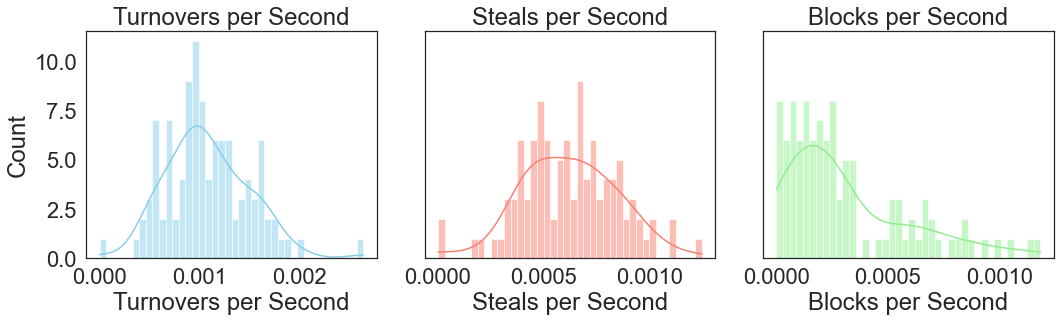

In [23]:
#Creating a bar plot to see the distribution of the following vairbales over seconds played
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

sns.histplot(data['tov_per_sec'], ax=ax1, bins=40, kde=True, color='skyblue')
ax1.set_title('Turnovers per Second')
ax1.set_xlabel('Turnovers per Second')

# Plot for 'stl_per_min'
sns.histplot(data['stl_per_sec'], ax=ax2, bins=40, kde=True, color='salmon')
ax2.set_title('Steals per Second')
ax2.set_xlabel('Steals per Second')

# Plot for 'blk_per_min'
sns.histplot(data['blk_per_sec'], ax=ax3, bins=40, kde=True, color='lightgreen')
ax3.set_title('Blocks per Second')
ax3.set_xlabel('Blocks per Second')

plt.tight_layout()
plt.show()

***Comment:***
As shown in the three plots above, "Turnovers per Second" and "Steals per Second" seem to be mostly symmetric, with "Turnovers per Second" being more condensed. However, "Blocks per Second" seems to be more skewed to the right, meaning there seems to be a lot more blocks per 0-2 seconds than the other variables.her variables.

### Bar Plots: Variables Over Time With Player Postions
Now let's try to recreate the barplots above, but for each player's specfic position played.

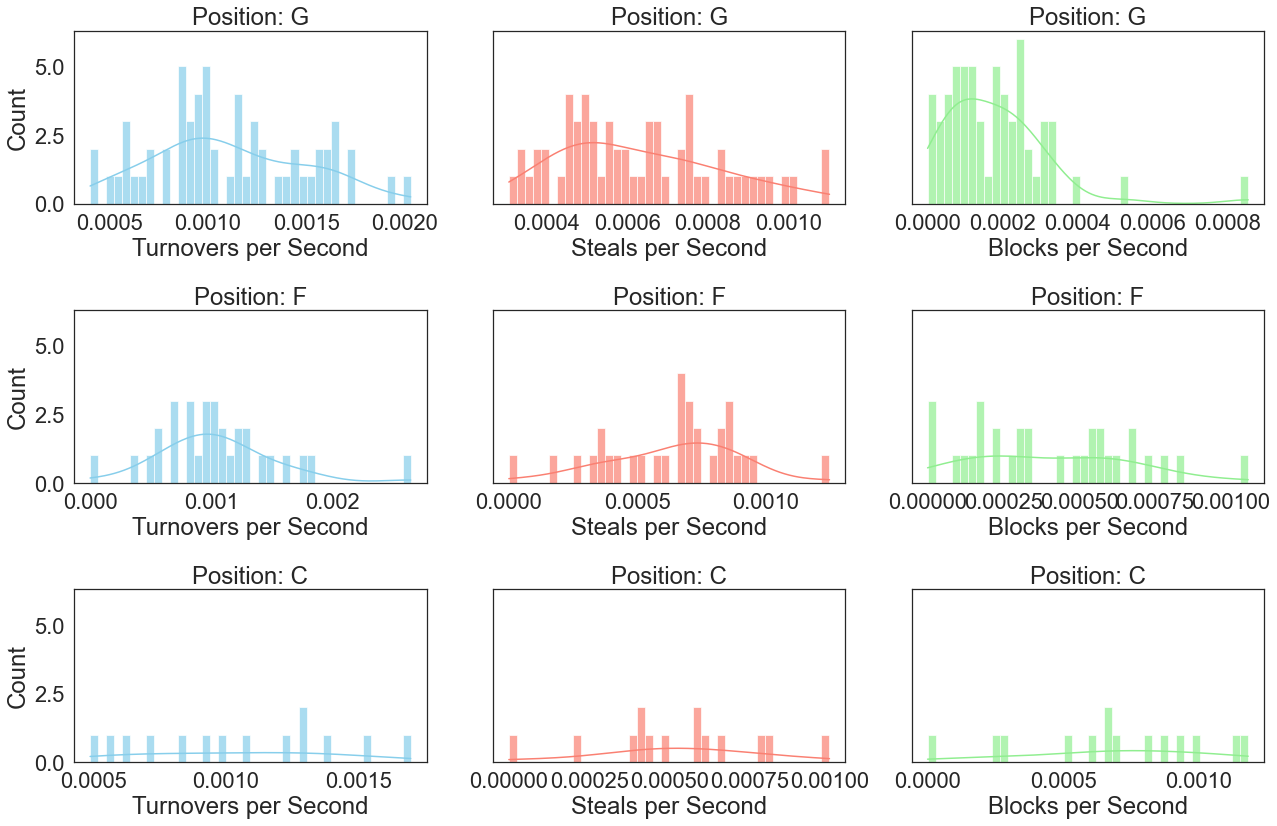

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(18, 12))

# Iterate over each position and create histograms
for i, position in enumerate(data['pos'].unique()):
    pos_data = data[data['pos'] == position]
    
    # Plot for 'tov_per_sec'
    sns.histplot(pos_data['tov_per_sec'], ax=axes[i, 0], bins=40, kde=True, color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Position: {position}')
    axes[i, 0].set_xlabel('Turnovers per Second')

    # Plot for 'stl_per_sec'
    sns.histplot(pos_data['stl_per_sec'], ax=axes[i, 1], bins=40, kde=True, color='salmon', alpha=0.7)
    axes[i, 1].set_title(f'Position: {position}')
    axes[i, 1].set_xlabel('Steals per Second')

    # Plot for 'blk_per_sec'
    sns.histplot(pos_data['blk_per_sec'], ax=axes[i, 2], bins=40, kde=True, color='lightgreen', alpha=0.7)
    axes[i, 2].set_title(f'Position: {position}')
    axes[i, 2].set_xlabel('Blocks per Second')

plt.tight_layout()
plt.show()

***Comment:***
As shown in the bar charts above, we can see that the position of player does seem to have some sort of relationship with Turnovers, Steals and Blocks (some more or less than others). For instance Position G seems have a right skew to thier data, meaning they have more more turnovers, steals and blocks per Second than the other positions. Position C is has a smaller relationship between their vairables, while Position C seems to have little to no relationship.

### ScatterPlot: Variables Over Time
Let's try to find if we can use scatterplots to show if there is a relationship between a player's position with the 3 attributes (turnovers, steals, blocks per second) and their average salary.

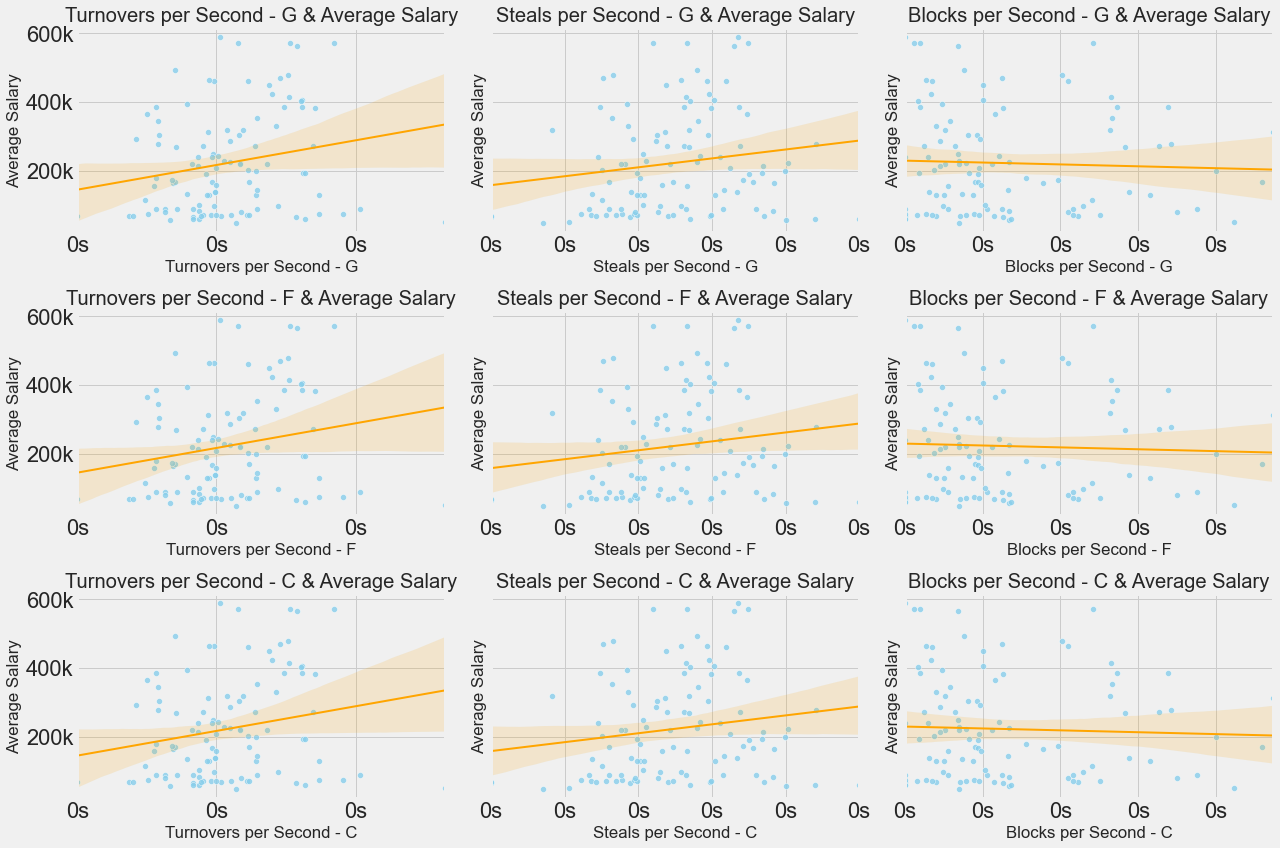

In [25]:
# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Function to format y-axis ticks in thousands
def format_thousands(value, pos):
    return f'{value/1000:.0f}k'

# Function to format x-axis ticks (time values)
def format_seconds(value, pos):
    return f'{value:.0f}s'

# Create a function to plot the following 3 variables
def create_lmplot(ax, x_col, y_col, xlabel, ylabel):
    sns.regplot(
        x=x_col,
        y=y_col,
        data=data,
        ax=ax,
        scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
        line_kws={'color': 'orange', 'linewidth': 2},
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} & {ylabel}')

    # Format x-axis ticks (time values)
    if 'per_sec' in x_col:
        ax.xaxis.set_major_formatter(FuncFormatter(format_seconds))

    # Format y-axis ticks to display in thousands
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Create subplots with a 3x3 grid for each position
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(18, 12))

for i, position in enumerate(data['pos'].unique()):
    pos_data = data[data['pos'] == position]
    create_lmplot(axes[i, 0], 'tov_per_sec', 'avg_salary', f'Turnovers per Second - {position}', 'Average Salary')
    create_lmplot(axes[i, 1], 'stl_per_sec', 'avg_salary', f'Steals per Second - {position}', 'Average Salary')
    create_lmplot(axes[i, 2], 'blk_per_sec', 'avg_salary', f'Blocks per Second - {position}', 'Average Salary')

plt.tight_layout()
plt.show()

***Comment:***
As you can see in the following scatterplots, there seems to be little to no correlation between the player's Postion with thier Turnovers, Steals or Blocks per Second compared with the Player's Average Salary. With this new found data, we feel we would no longer procede exploring these following variables.

### Wins and Losses analysis
As wins and losses should be an important factor in determining a player's salary, we want to do analysis on the distribution of the variable. However, we first want to turn the wins and losses of a player into their own winrate, in this way, we will have a more accurate representation of player's win rate without biasing on the games they have played. 

In [26]:
#First let's look at the data again
data.head(5)

,year,player,pos,fa_type,prev_team,new_team,years,avg_salary,next_cap_hit,gp,...,stl,blk,height,weight,usage_rate,true_shooting,ast_rate,tov_per_sec,stl_per_sec,blk_per_sec
0,2020.0,Kristi Toliver,G,UFA,WAS,LA,3.0,571817.0,190606.0,23.0,...,27.0,2.0,67.0,130.0,19.7,59.5,30.6,0.001155,0.000664,0.000049
1,2020.0,Bria Hartley,G,UFA,NY,PHX,3.0,571550.0,190517.0,24.0,...,18.0,1.0,68.0,148.0,22.8,49.2,25.5,0.001529,0.000550,0.000031
2,2020.0,Isabelle Harrison,F,UFA,DAL,DAL,3.0,463365.0,154455.0,31.0,...,35.0,25.0,75.0,183.0,17.8,49.5,10.8,0.000985,0.000734,0.000524
3,2020.0,Courtney Vandersloot,G,UFA,CHI,CHI,2.0,406000.0,203000.0,33.0,...,45.0,15.0,68.0,145.0,18.5,55.2,43.4,0.001615,0.000757,0.000252
4,2020.0,Allie Quigley,G,UFA,CHI,CHI,2.0,394000.0,197000.0,34.0,...,27.0,7.0,70.0,140.0,18.1,63.2,13.6,0.000789,0.000463,0.000120


In [27]:
#Create a new column that's called win rate
data['win_rate']=data['w']/(data['w']+data['l'])

We want to see how win rate is distributed as a whole first, we'd expect win rate should be normally distributed 

Text(0.5, 0, 'Win rate')

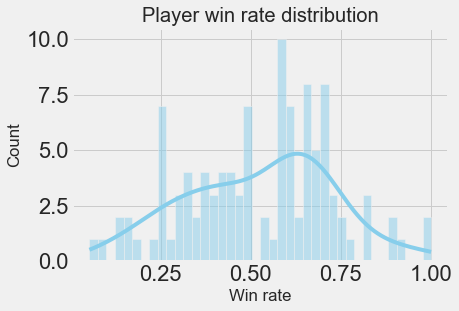

In [28]:
win_rate_plot = sns.histplot(data['win_rate'], bins=40, color='skyblue',kde=True)
win_rate_plot.set_title("Player win rate distribution")
win_rate_plot.set_xlabel("Win rate")

We see that the win rate is somewhat normally distributed across the players, and we do see that there are players with 0 percent win rate and players with 100 percent win rate, this might due to them have only played 1 or 2 games, which would drastially impact their win rate, let's see those individuals in detail

In [29]:
data[(data['win_rate']==1.0)|(data['win_rate']==0.0)]

,year,player,pos,fa_type,prev_team,new_team,years,avg_salary,next_cap_hit,gp,...,blk,height,weight,usage_rate,true_shooting,ast_rate,tov_per_sec,stl_per_sec,blk_per_sec,win_rate
58,2021.0,Emma Cannon,F,UFA,LV,LV,1.0,58170.0,58170.0,1.0,...,0.0,74.0,190.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
75,2022.0,Angel McCoughtry,F,UFA,LV,MIN,1.0,130000.0,130000.0,1.0,...,0.0,73.0,173.0,100.0,0.0,0.0,NaN,NaN,NaN,1.0


We see both players that had a hundred percent winrate are all players that just played one game, for this reason we want to drop them due to them having too little sample to work with. For the same reason, we want to drop any player who had played less than 5 games in total, because their win rate would either overestimate or underestimate their true win rate

,year,player,pos,fa_type,prev_team,new_team,years,avg_salary,next_cap_hit,gp,...,blk,height,weight,usage_rate,true_shooting,ast_rate,tov_per_sec,stl_per_sec,blk_per_sec,win_rate
0,2020.0,Kristi Toliver,G,UFA,WAS,LA,3.0,571817.0,190606.0,23.0,...,2.0,67.0,130.0,19.7,59.5,30.6,0.001155,0.000664,0.000049,0.695652
1,2020.0,Bria Hartley,G,UFA,NY,PHX,3.0,571550.0,190517.0,24.0,...,1.0,68.0,148.0,22.8,49.2,25.5,0.001529,0.000550,0.000031,0.166667
2,2020.0,Isabelle Harrison,F,UFA,DAL,DAL,3.0,463365.0,154455.0,31.0,...,25.0,75.0,183.0,17.8,49.5,10.8,0.000985,0.000734,0.000524,0.258065
3,2020.0,Courtney Vandersloot,G,UFA,CHI,CHI,2.0,406000.0,203000.0,33.0,...,15.0,68.0,145.0,18.5,55.2,43.4,0.001615,0.000757,0.000252,0.606061
4,2020.0,Allie Quigley,G,UFA,CHI,CHI,2.0,394000.0,197000.0,34.0,...,7.0,70.0,140.0,18.1,63.2,13.6,0.000789,0.000463,0.000120,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2023.0,Chiney Ogwumike,F,UFA,LA,LA,1.0,90000.0,90000.0,26.0,...,9.0,75.0,183.0,18.5,53.4,9.8,0.001290,0.000662,0.000314,0.461538
122,2023.0,Theresa Plaisance,F,UFA,LV,SEA,1.0,90000.0,90000.0,31.0,...,13.0,77.0,200.0,14.9,51.5,6.2,0.000831,0.000333,0.000540,0.709677
123,2023.0,Kiah Stokes,C,UFA,LV,LV,1.0,81000.0,81000.0,31.0,...,25.0,75.0,191.0,7.9,51.4,6.0,0.000630,0.000490,0.000875,0.709677
124,2023.0,Kristi Toliver,G,UFA,LA,WAS,1.0,75000.0,75000.0,11.0,...,0.0,67.0,130.0,15.5,56.0,23.4,0.001911,0.000306,0.000000,0.363636


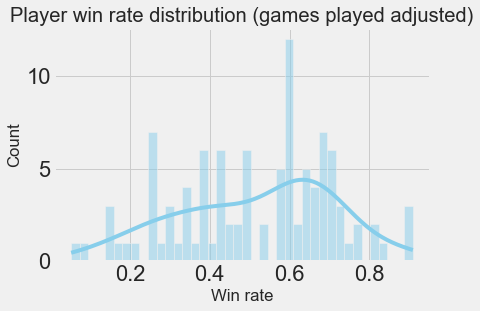

In [30]:
win_rate_transformed = data[data['gp']>=6]

win_rate_plot = sns.histplot(win_rate_transformed['win_rate'], bins=40, color='skyblue',kde=True)
win_rate_plot.set_title("Player win rate distribution (games played adjusted)")
win_rate_plot.set_xlabel("Win rate")
win_rate_transformed

Overall we see that player's win rate tend to skewed left, which means a large portion of players (who plays 5 games or above) has a win rate above 50 percent. Now let's try to break down the win rate by different roles of each player, because there may be cases where impact is different across the roles, thus causing a difference in win rate.

Text(0.5, 0, 'Win rate')

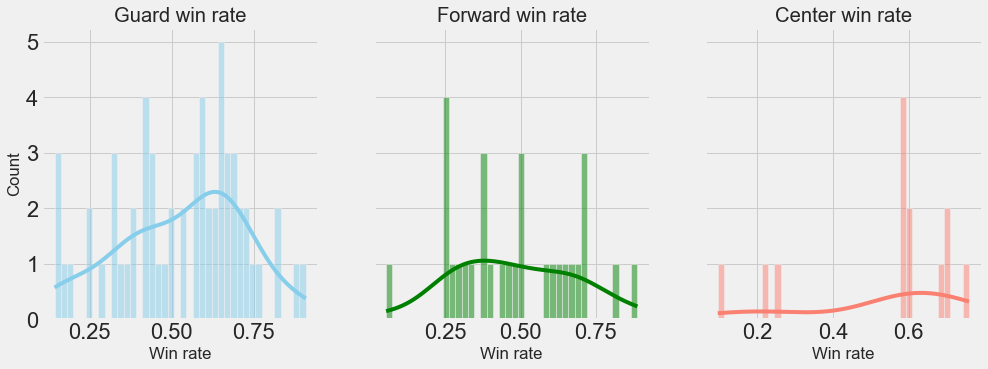

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))
g_wrate = win_rate_transformed[win_rate_transformed['pos']=='G']
f_wrate = win_rate_transformed[win_rate_transformed['pos']=='F']
c_wrate = win_rate_transformed[win_rate_transformed['pos']=='C']
sns.histplot(data=g_wrate, ax=ax1,x='win_rate', bins=40, color='skyblue',kde=True)
ax1.set_title("Guard win rate")
ax1.set_xlabel("Win rate")
sns.histplot(data=f_wrate, ax=ax2,x='win_rate', bins=40, color='green',kde=True)
ax2.set_title("Forward win rate")
ax2.set_xlabel("Win rate")
sns.histplot(data=c_wrate, ax=ax3,x='win_rate', bins=40, color='salmon',kde=True)
ax3.set_title("Center win rate")
ax3.set_xlabel("Win rate")

We see that the distribution across roles really don't differ much. While Guard and Center win rate are more left wards skewed and Forward is more normally distributed, the difference could arrise from the sample size of Guard, Forward, and Center with there are more players in the data that plays guard position. We could also see this with a box-plot.

[Text(0.5, 1.0, 'Win rate by roles')]

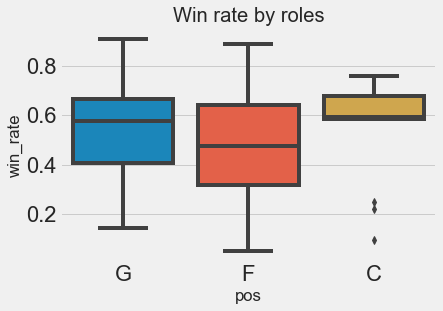

In [32]:
sns.boxplot(data=win_rate_transformed, x='pos', y='win_rate').set(title='Win rate by roles')

Now let's see what's the relationship between win rate and average salary of a player and see if there is a general correlation between the two.

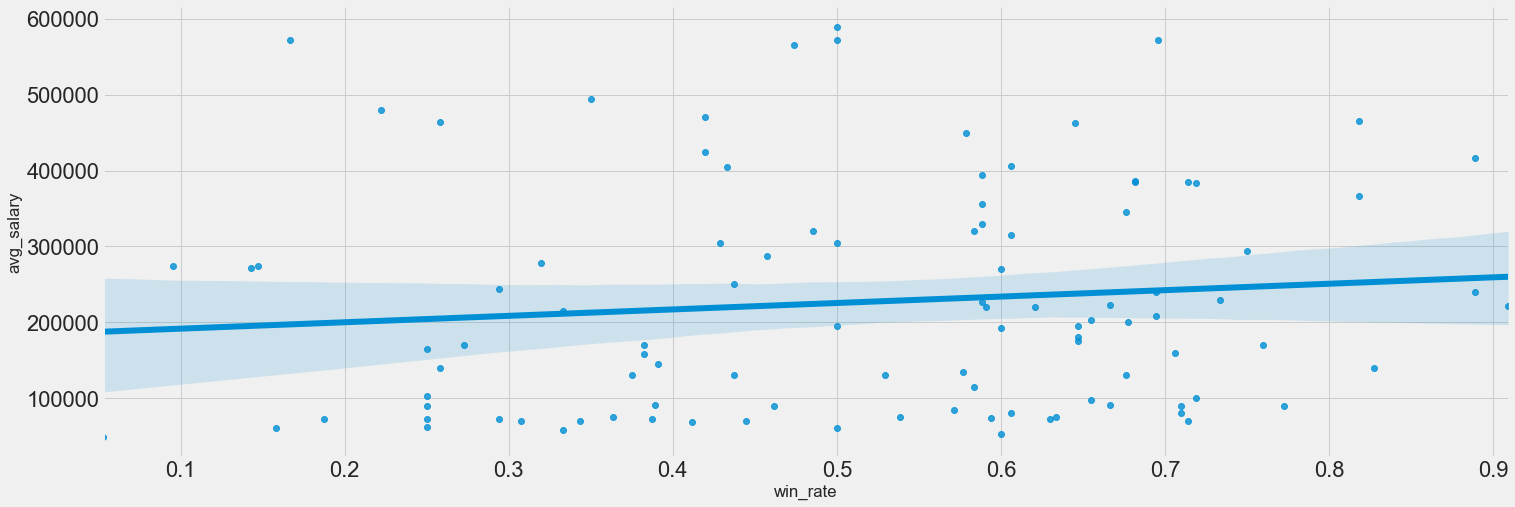

In [33]:
sns.lmplot(data=win_rate_transformed, x= 'win_rate',y='avg_salary',height=7,aspect=3)

It doesn't appear to be a correlation between a player's win rate with their average signed salary. However, it does show that there are more concentrated players that have a higher salary with high winrate. Do notice that each position's salary could be different, so let's see what will happen to the correlation if we divide up the avg salary by roles.

Text(0.5, 1.0, 'Forward')

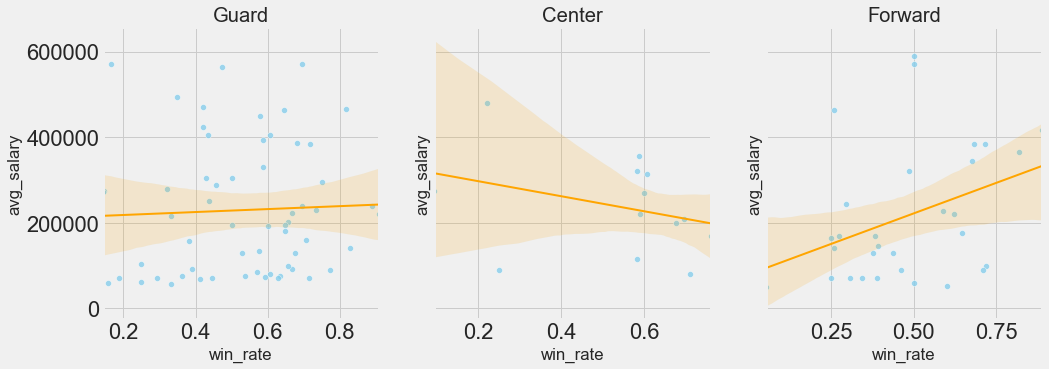

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))
sns.regplot(data=g_wrate, ax=ax1,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'win_rate',y='avg_salary').set_title("Guard")
sns.regplot(data=c_wrate, ax=ax2,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'win_rate',y='avg_salary').set_title("Center")
sns.regplot(data=f_wrate, ax=ax3,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'win_rate',y='avg_salary').set_title("Forward")

The relationship seems ambigous between win_rate and player's average salary. For the position that has the most data points, win rate and average salary doesn't seem to have a correlation while for Center and Forward positions, there seem to be a weak relationship between win rate and average salary. However, for now, the conclusion is that win rate doesn't seem to have a correlation with the average salary, but additional variable could be included to address the difference.

### Points per minute analysis 
We also want to see how points per minute are distributed across the players. This is also an important factor because points per minute could tell us how point efficient a player is at scoring.

In [35]:
#Create a pts_min column that is the result of dividing total points by total minutes a player has played
data['pts_min']=data['pts']/(data['min'])
data['pts_min'].describe()

count    105.000000
mean       0.383786
std        0.115645
min        0.000000
25%        0.318124
50%        0.378512
75%        0.450000
max        0.704373
Name: pts_min, dtype: float64

Let's see the general distribution of the data

Text(0.5, 0, 'Points/Min')

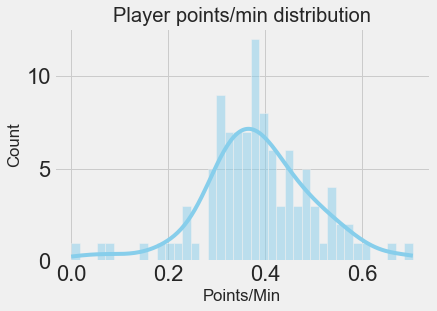

In [36]:
pts_plot = sns.histplot(data['pts_min'], bins=40, color='skyblue',kde=True)
pts_plot.set_title("Player points/min distribution")
pts_plot.set_xlabel("Points/Min")

The distribution is a nice normal distribution with mean centered around 0.4 points/min. Now let's break down and see the distribution by different roles, because players' role could impact how much one can score in a game. 

Text(0.5, 0, 'Points/Min')

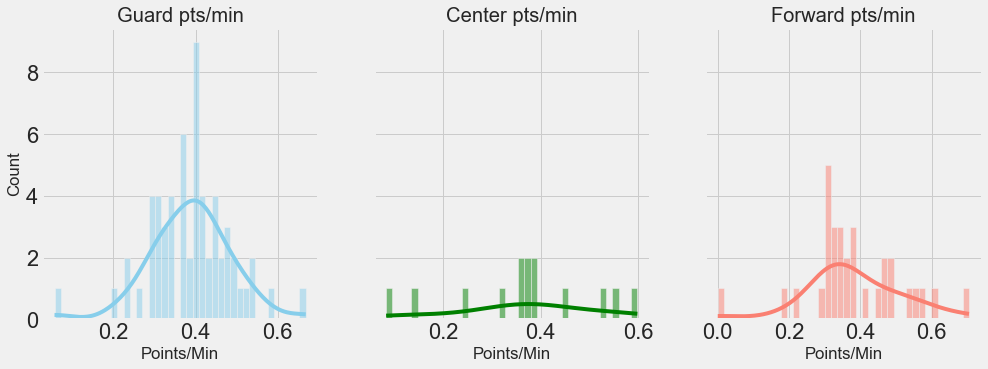

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))
gpts = data[data['pos']=='G']
cpts = data[data['pos']=='C']
fpts = data[data['pos']=='F']
sns.histplot(data=gpts, ax=ax1,x='pts_min', bins=40, color='skyblue',kde=True)
ax1.set_title("Guard pts/min")
ax1.set_xlabel("Points/Min")
sns.histplot(data=cpts, ax=ax2,x='pts_min', bins=40, color='green',kde=True)
ax2.set_title("Center pts/min")
ax2.set_xlabel("Points/Min")
sns.histplot(data=fpts, ax=ax3,x='pts_min', bins=40, color='salmon',kde=True)
ax3.set_title("Forward pts/min")
ax3.set_xlabel("Points/Min")

All three graphs are all normally distributed and with a simlar mean, which means a player's role doesn't seem to impact one's scoring capability. Let's see a box-plot on the data see if we are right.

[Text(0.5, 1.0, 'Points/min by roles')]

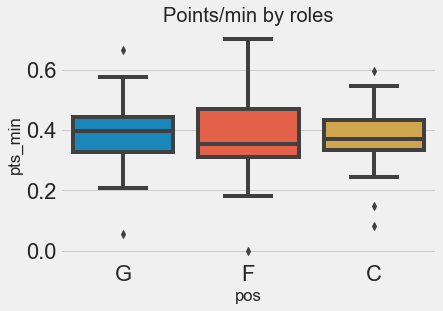

In [38]:
sns.boxplot(data=data, x='pos', y='pts_min').set(title='Points/min by roles')

We do see that all three roles share a similar box-and-whisker graphs, which means we are right about how roles don't seem to have an effect on player's scoring capability. Now we want to see how points/min could have an correlation on player's average salary

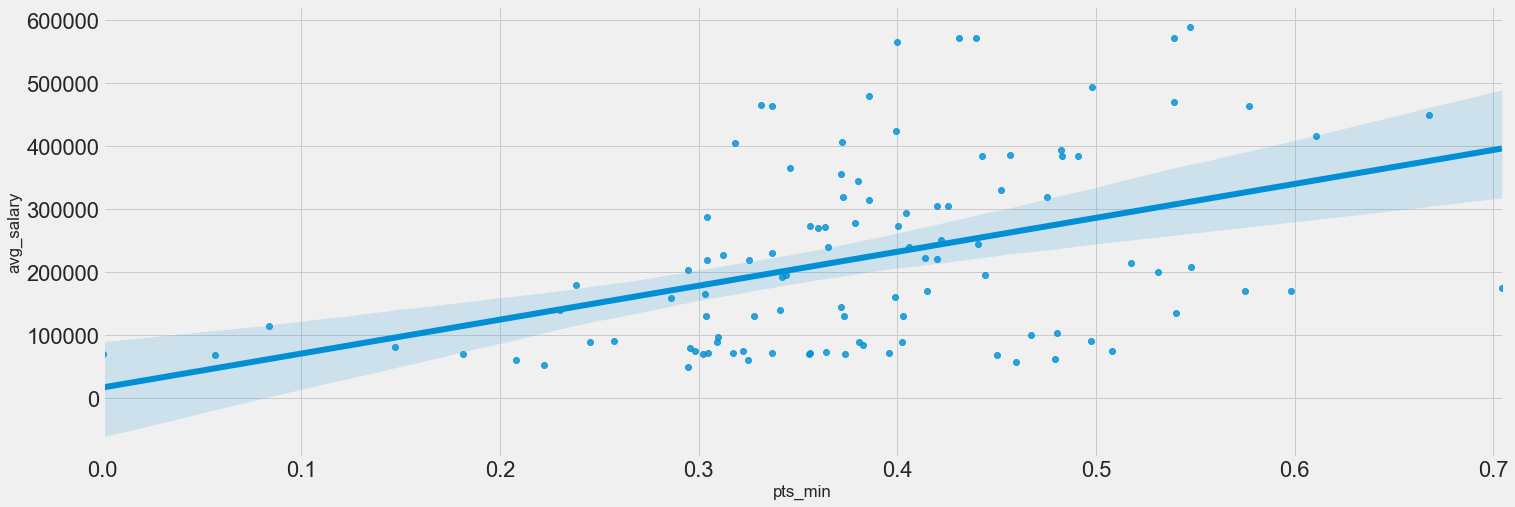

In [39]:
sns.lmplot(data=data, x= 'pts_min',y='avg_salary',height=7,aspect=3)

We see a rather strong positive correlation between how much a player can score in a minute with their average salary, and it looks like for each 0.1 increase in pts_min, a player could have an around 100,000 increase in her average salary. Now we want to see how roles could impact the average salary in addition to pts_min.

Text(0.5, 1.0, 'Forward')

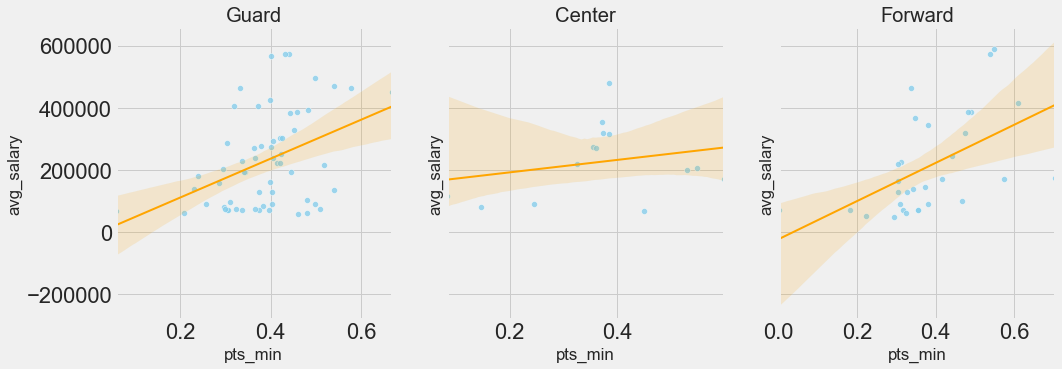

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))
sns.regplot(data=gpts, ax=ax1,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'pts_min',y='avg_salary').set_title("Guard")
sns.regplot(data=cpts, ax=ax2,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'pts_min',y='avg_salary').set_title("Center")
sns.regplot(data=fpts, ax=ax3,
            scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
            line_kws={'color': 'orange', 'linewidth': 2},x= 'pts_min',y='avg_salary').set_title("Forward")

We do see that for each role's average salary, they all show a positive correlation between pts_min and player's average salary. Therefore, we should include pts_min as a strong variable when we are moving on to analysis on which attributes would contribute to the prediction of a player's average salary.

Now let's look into some biological factors of players that can come into play. We will also being looking at usage rate, which is the percentage that quantifies the extent to which a player participates in offensive plays.

Factors we will look into:
1. Height
2. Weight
3. Usage Rate

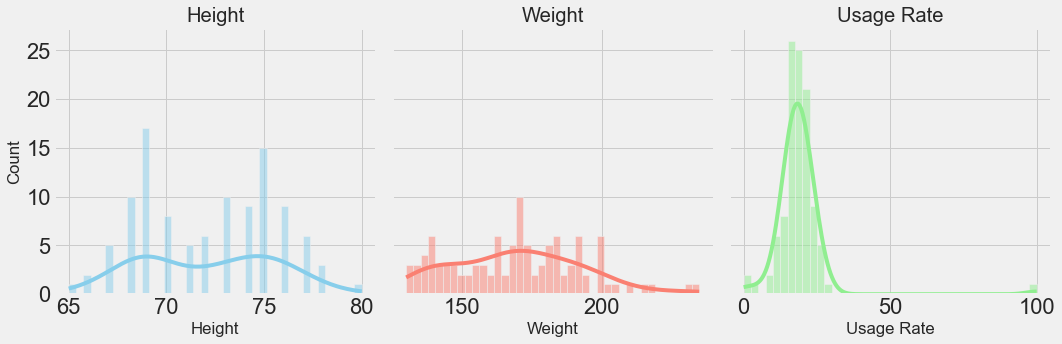

In [41]:
#Creating a bar plot to see the distribution of the following
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

# Plot for 'height'
sns.histplot(data['height'], ax=ax1, bins=40, kde=True, color='skyblue')
ax1.set_title('Height')
ax1.set_xlabel('Height')

# Plot for 'weight'
sns.histplot(data['weight'], ax=ax2, bins=40, kde=True, color='salmon')
ax2.set_title('Weight')
ax2.set_xlabel('Weight')

# Plot for 'usage_rate'
sns.histplot(data['usage_rate'], ax=ax3, bins=40, kde=True, color='lightgreen')
ax3.set_title('Usage Rate')
ax3.set_xlabel('Usage Rate')

plt.tight_layout()
plt.show()

Looking at the models, we can see that there seems to be outliers in both the 'weight' and 'usage rate' columns. To get a better representation of what the data looks like, we will remove the outliers through filtering and look at these graphs again. These weights can be explained just by variations in height or figure, while the outliers in usage rate can be due to a player not having many opportunities to play, therefore making their usage rate percentage a lot higher. For example, if a player plays once and has a 100% usage rate and never plays again, they will maintain that high usage rate for the rest of the season. 

In [42]:
# Adjusting for outliers in the 'weight' and 'usage_rate'
bio_data = data.loc[(data['weight'] < 200) & (data['usage_rate'] < 70), :]

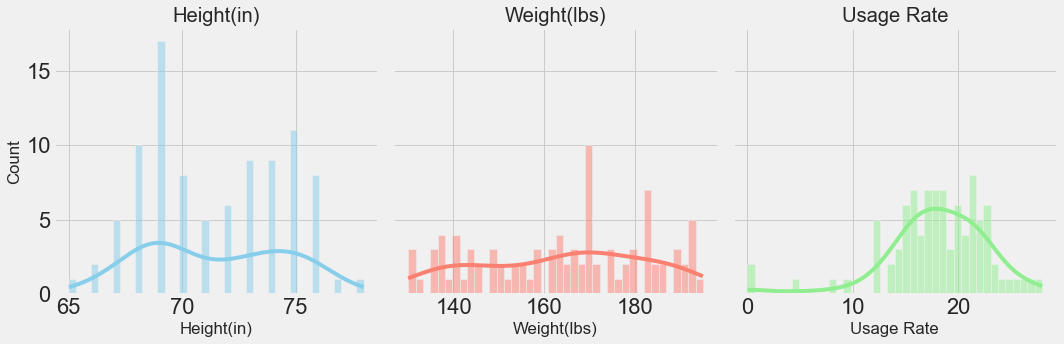

In [43]:
# Creating a bar plot to see the distribution of the following
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

# Plot for 'height'
sns.histplot(bio_data['height'], ax=ax1, bins=40, kde=True, color='skyblue')
ax1.set_title('Height(in)')
ax1.set_xlabel('Height(in)')

# Adjusted plot for 'weight'
sns.histplot(bio_data['weight'], ax=ax2, bins=40, kde=True, color='salmon')
ax2.set_title('Weight(lbs)')
ax2.set_xlabel('Weight(lbs)')

# Adjusted plot for 'usage_rate'
sns.histplot(bio_data['usage_rate'], ax=ax3, bins=40, kde=True, color='lightgreen')
ax3.set_title('Usage Rate')
ax3.set_xlabel('Usage Rate')

plt.tight_layout()
plt.show()

After readjusting these models, we can see that the height model is a bimodal distrubtion in that there seems to be two peaks. One of which is around 69 inches and the other around 75 inches. We can assume that most players are within these height ranges of 69 and 75 inches. Looking over toward the weight, it is skewed a little bit more toward the left, meaning that more players tend to weigh closer to 168 lbs, however, the distribution is close to uniform, so there is not too much variation between the weights of players. As for usage rate, it is heavily skewed left, meaning that more players tend to have a 18% usage rate.

#### Bar Plots: Biological Factors & Usage Rate w/ Player Position

We will recreate the bar plots from above but base it around player position to see if there are any correlations between the two.

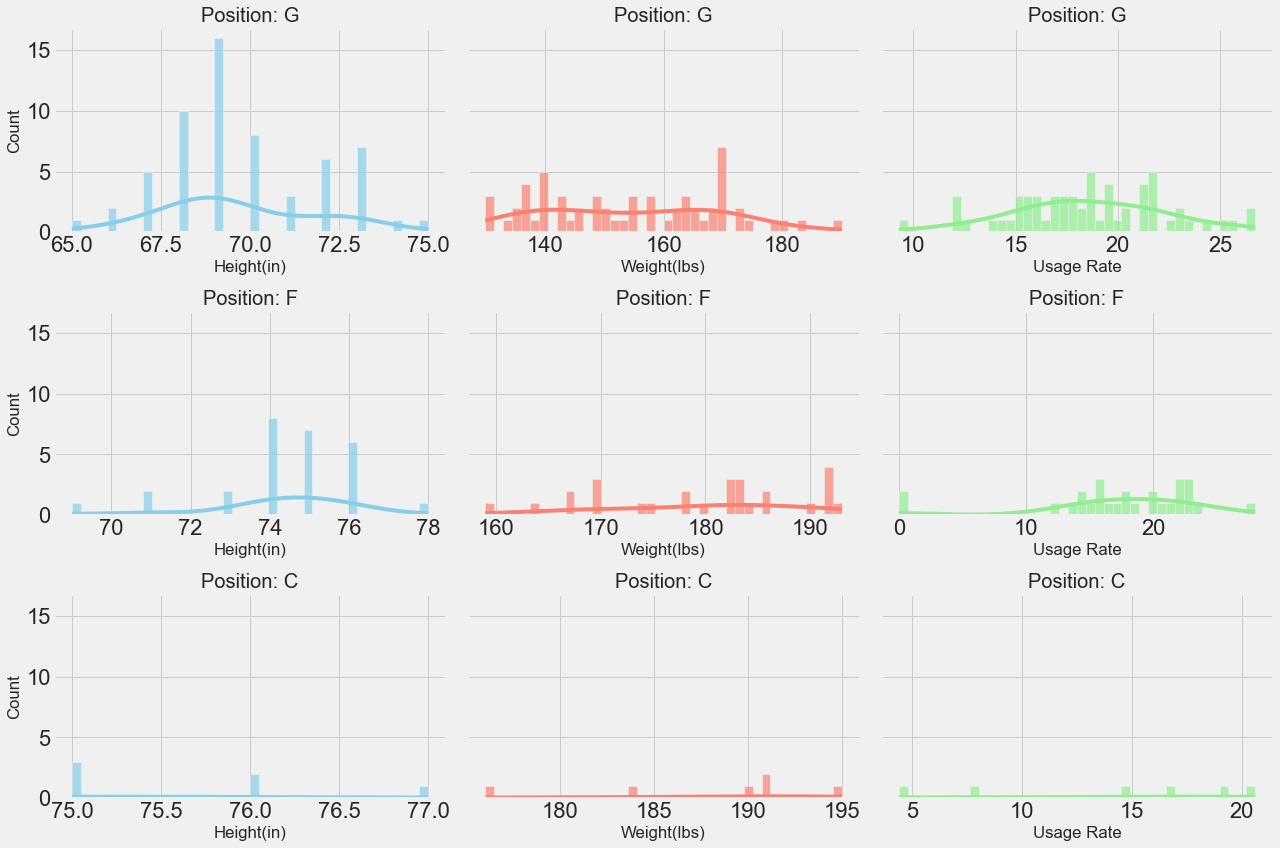

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(18, 12))

# Iterate over each position and create histograms
for i, position in enumerate(bio_data['pos'].unique()):
    pos_data = bio_data[bio_data['pos'] == position]
    
    # Plot for 'height'
    sns.histplot(pos_data['height'], ax=axes[i, 0], bins=40, kde=True, color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Position: {position}')
    axes[i, 0].set_xlabel('Height(in)')

    # Plot for 'weight'
    sns.histplot(pos_data['weight'], ax=axes[i, 1], bins=40, kde=True, color='salmon', alpha=0.7)
    axes[i, 1].set_title(f'Position: {position}')
    axes[i, 1].set_xlabel('Weight(lbs)')

    # Plot for 'usage_rate'
    sns.histplot(pos_data['usage_rate'], ax=axes[i, 2], bins=40, kde=True, color='lightgreen', alpha=0.7)
    axes[i, 2].set_title(f'Position: {position}')
    axes[i, 2].set_xlabel('Usage Rate')

plt.tight_layout()
plt.show()

From the plots above, there does not seem to be a drastic difference betwen the distibutions based on position. Therefore, we will consider player positions not a factor that we need to consider when creating our scatter plots below.

#### Scatter Plots: Biological Factors & Usage Rate

We will now create scatter plots to see the general correlation between players salary and the factors we detailed above.

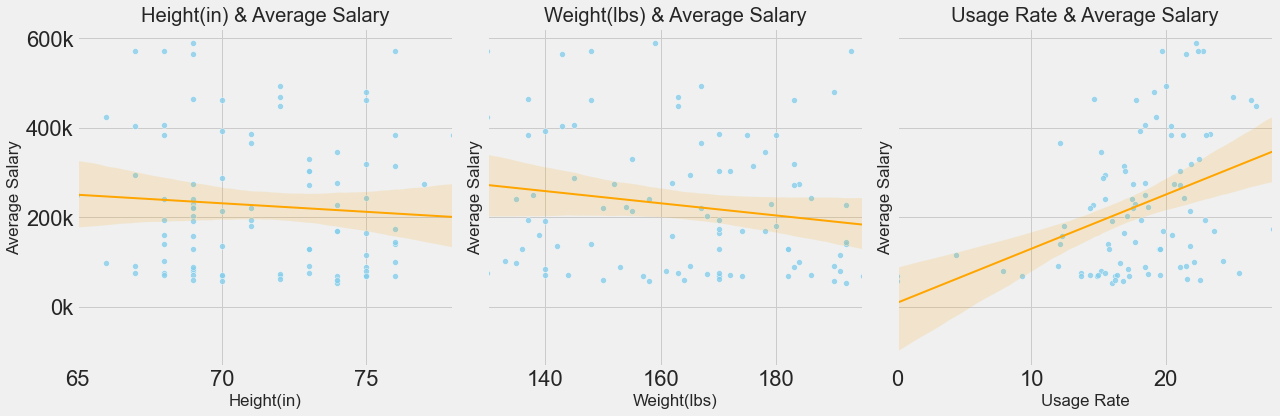

In [45]:
# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Function to format y-axis ticks in thousands
def format_thousands(value, pos):
    return f'{value/1000:.0f}k'

# Create a function to plot the following 3 variables
def create_lmplot(ax, x_col, y_col, xlabel, ylabel):
    sns.regplot(
        x=x_col,
        y=y_col,
        data=bio_data,
        ax=ax,
        scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
        line_kws={'color': 'orange', 'linewidth': 2},
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} & {ylabel}')

    # Format y-axis ticks to display in thousands
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Create subplots with a 1x3 grid
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))

create_lmplot(axes[0], 'height', 'avg_salary', 'Height(in)', 'Average Salary')
create_lmplot(axes[1], 'weight', 'avg_salary', 'Weight(lbs)', 'Average Salary')
create_lmplot(axes[2], 'usage_rate', 'avg_salary', 'Usage Rate', 'Average Salary')

plt.tight_layout()
plt.show()

From this, we can see that there is a generally weak negative correlation between player height and weight with salary. The taller or heavier a player is, their average salary tends to be lower. However, when it comes to usage rate, there seems to be a strong positive correlation in that when the usage rate of a player is higher, their average salary tends to be higher as well. 

### Bar Plots: Variables Over Time
Now let's try to create a bar plot for each of the 3 variables (3 point percentage, true shooting percentage, and assist rate), to find any sort of grouping or usefule information.

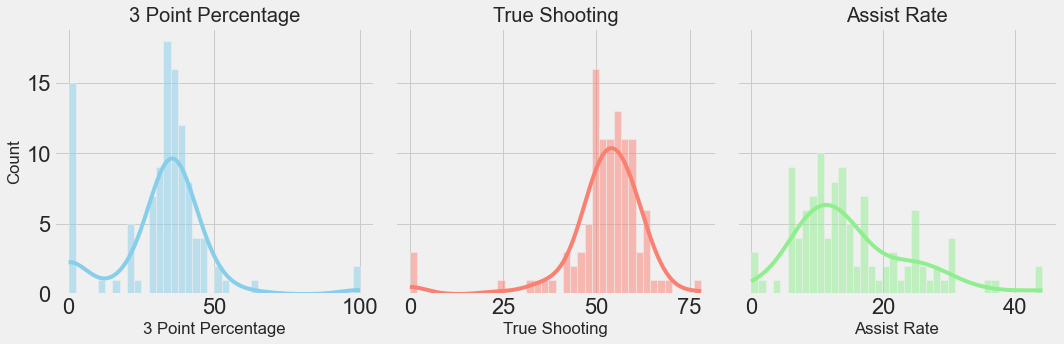

In [46]:
#Creating a bar plot to see the distribution of the following
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

# Plot for '3 point percentage'
sns.histplot(data['3pp'], ax=ax1, bins=40, kde=True, color='skyblue')
ax1.set_title('3 Point Percentage')
ax1.set_xlabel('3 Point Percentage')

# Plot for 'True Shooting'
sns.histplot(data['true_shooting'], ax=ax2, bins=40, kde=True, color='salmon')
ax2.set_title('True Shooting')
ax2.set_xlabel('True Shooting')

# Plot for 'Assist Rate'
sns.histplot(data['ast_rate'], ax=ax3, bins=40, kde=True, color='lightgreen')
ax3.set_title('Assist Rate')
ax3.set_xlabel('Assist Rate')

plt.tight_layout()
plt.show()

Looking at the 3 plots, we can see that "3 Point Percentage" and "Assist Rate" seem to be more skewed to the left and "True Shooting" seems to be more skewed to the right. However, we can see are some outliers that are either equal to 0 or 100 in "3 Point Percentage" and "True Shooting". These can result from players attempting very few shots and making zero or all of them. We'll remove these outsliers and regenerate the plots to get a better look at our data.

In [47]:
# Adjusting for outliers in the '3pp' and 'true_shooting'
adjusted_data = data.loc[(data['3pp'] < 100) & (data['3pp'] > 0) & (data['true_shooting'] > 0), :]

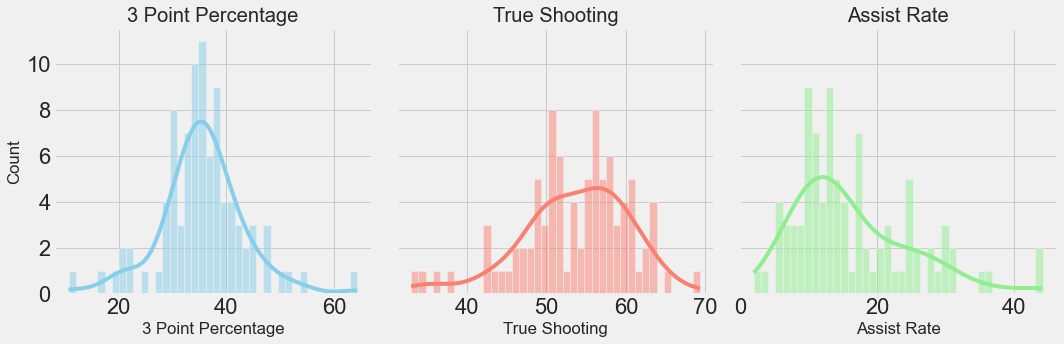

In [48]:
#Creating a bar plot to see the distribution of the following
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

# Plot for '3 point percentage'
sns.histplot(adjusted_data['3pp'], ax=ax1, bins=40, kde=True, color='skyblue')
ax1.set_title('3 Point Percentage')
ax1.set_xlabel('3 Point Percentage')

# Plot for 'True Shooting'
sns.histplot(adjusted_data['true_shooting'], ax=ax2, bins=40, kde=True, color='salmon')
ax2.set_title('True Shooting')
ax2.set_xlabel('True Shooting')

# Plot for 'Assist Rate'
sns.histplot(adjusted_data['ast_rate'], ax=ax3, bins=40, kde=True, color='lightgreen')
ax3.set_title('Assist Rate')
ax3.set_xlabel('Assist Rate')

plt.tight_layout()
plt.show()

After readjusting these models, we can see that "3 Point Percentage" is a unimodal distribution peaking at around 35%, "True Shooting" is a unimodal distribution peaking at around 50% to 60%, and "Assist Rate" is skewed to the left peaking at around 10% to 15%.

#### Bar Plots: Incorporating Player Position

We will recreate the bar plots from above but base it around player position to see if there are any correlations between the two.

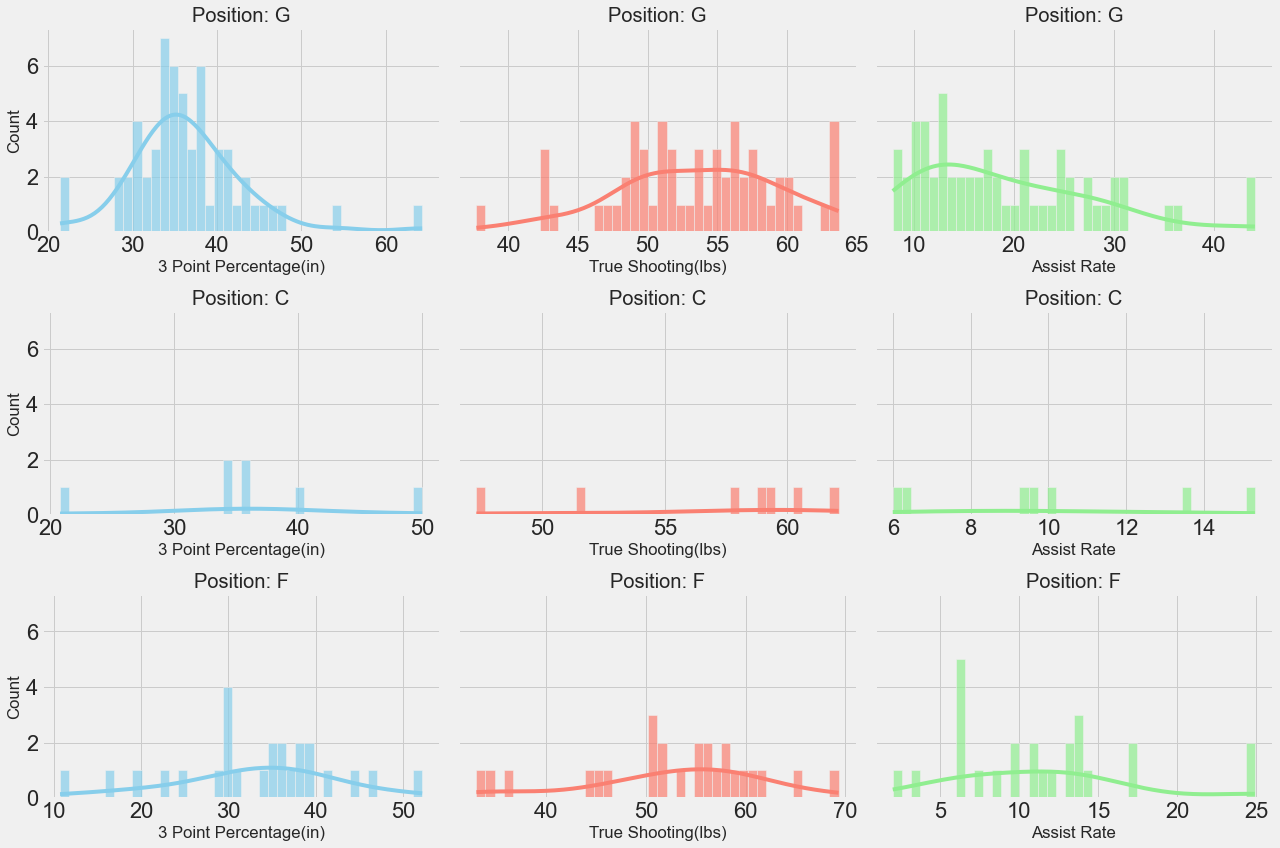

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(18, 12))

# Iterate over each position and create histograms
for i, position in enumerate(adjusted_data['pos'].unique()):
    pos_data = adjusted_data[adjusted_data['pos'] == position]
    
    # Plot for '3pp'
    sns.histplot(pos_data['3pp'], ax=axes[i, 0], bins=40, kde=True, color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Position: {position}')
    axes[i, 0].set_xlabel('3 Point Percentage(in)')

    # Plot for 'true_shooting'
    sns.histplot(pos_data['true_shooting'], ax=axes[i, 1], bins=40, kde=True, color='salmon', alpha=0.7)
    axes[i, 1].set_title(f'Position: {position}')
    axes[i, 1].set_xlabel('True Shooting(lbs)')

    # Plot for 'ast_rate'
    sns.histplot(pos_data['ast_rate'], ax=axes[i, 2], bins=40, kde=True, color='lightgreen', alpha=0.7)
    axes[i, 2].set_title(f'Position: {position}')
    axes[i, 2].set_xlabel('Assist Rate')

plt.tight_layout()
plt.show()

Aside from the fact that there are significantly fewer data for the center position in all three factors, there does not seem to be a drastic difference betwen the distibutions based on position. Therefore, we will consider player positions not a factor that we need to consider when creating our scatter plots below.

#### Scatter Plots

We will now create scatter plots to see the general correlation between players salary and the factors we detailed above.

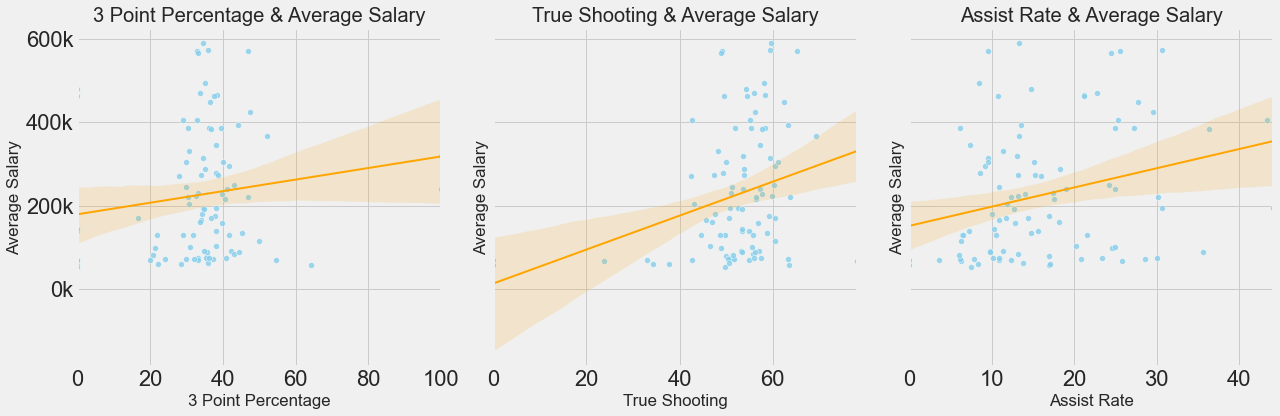

In [50]:
# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Function to format y-axis ticks in thousands
def format_thousands(value, pos):
    return f'{value/1000:.0f}k'

# Create a function to plot the following 3 variables
def create_lmplot(ax, x_col, y_col, xlabel, ylabel):
    sns.regplot(
        x=x_col,
        y=y_col,
        data=bio_data,
        ax=ax,
        scatter_kws={'color': 'skyblue', 'edgecolor': 'white', 'linewidths': 0.5},
        line_kws={'color': 'orange', 'linewidth': 2},
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} & {ylabel}')

    # Format y-axis ticks to display in thousands
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Create subplots with a 1x3 grid
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))

create_lmplot(axes[0], '3pp', 'avg_salary', '3 Point Percentage', 'Average Salary')
create_lmplot(axes[1], 'true_shooting', 'avg_salary', 'True Shooting', 'Average Salary')
create_lmplot(axes[2], 'ast_rate', 'avg_salary', 'Assist Rate', 'Average Salary')

plt.tight_layout()
plt.show()

From this, we can see that all three factors, especially true shooting percentage, have a positive correlation with salary. Therefore, we should include true_shooting as a strong variable when we are moving on to analysis on which attributes would contribute to the prediction of a player's average salary.

### Exploring WNBA Salaries

Below we'll create a histogram of average player salaries across our entire dataset to get a better sense of our outcome ranges.

Text(0.5, 1.0, 'Average Salary')

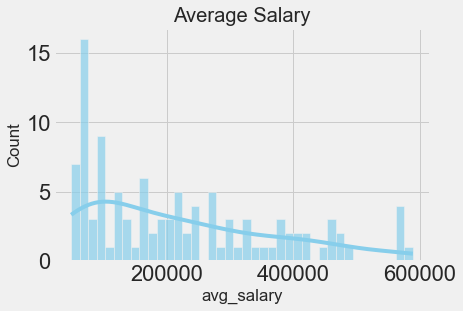

In [51]:
salary_data = data[['year', 'player', 'pos', 'fa_type', 'avg_salary']]

# Plot average salary histogram of entire dataset
sns.histplot(salary_data['avg_salary'], bins=40, kde=True, color='skyblue', alpha=0.7)
plt.title('Average Salary')

The histogram has a flat right skew, with the majority of salaries falling below 200k. Player salary across all sports tends to be grow (or shrink) depending on the success of the sport itself. Below we'll examine if there have been any drastic changes over the years.

2020 Salary Mean: 270872.74
2021 Salary Mean: 253017.21
2022 Salary Mean: 157302.3
2023 Salary Mean: 224424.67


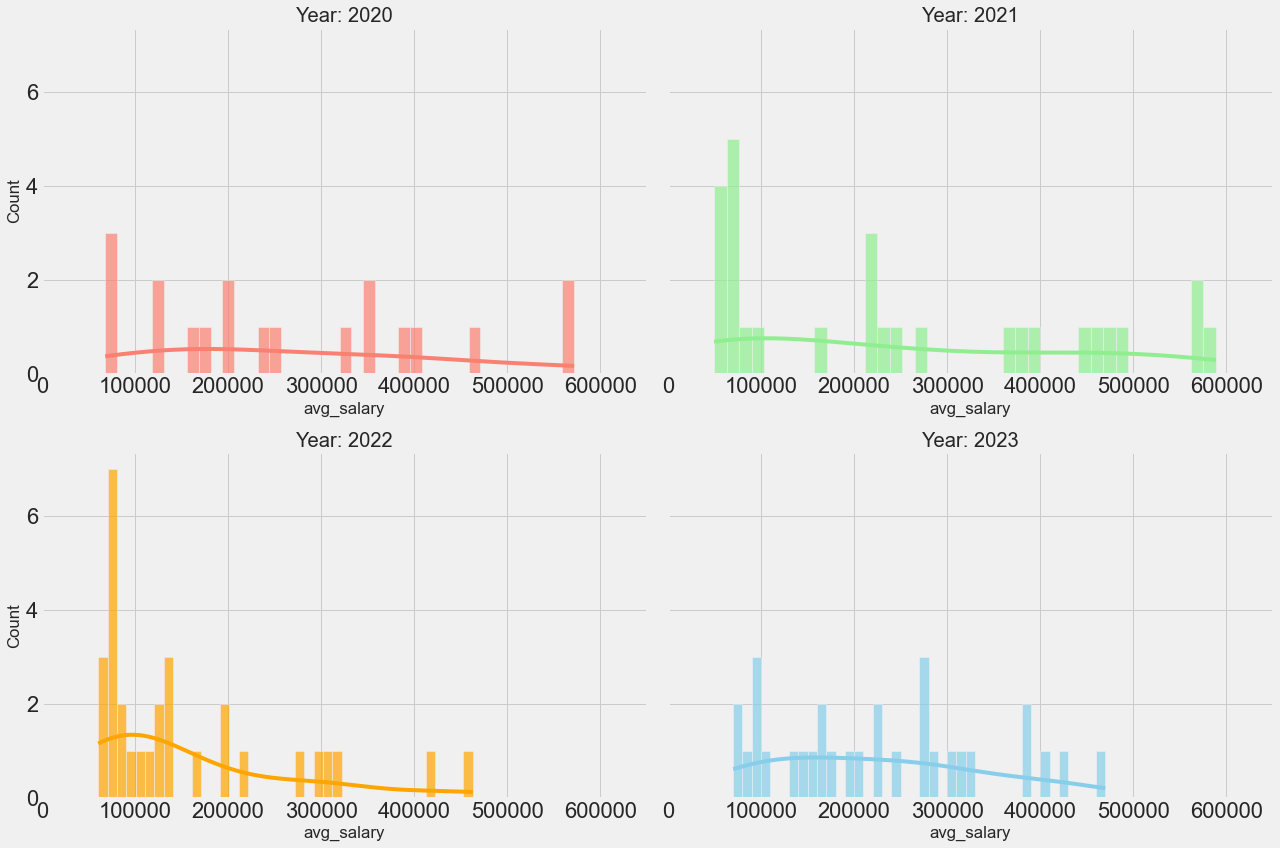

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(18, 12))

# Plot average salaries of 2020 free agency class
sns.histplot(salary_data[salary_data['year'] == 2020]['avg_salary'], 
             ax=axes[0, 0], bins=40, kde=True, color='salmon', alpha=0.7)
axes[0, 0].set_title(f'Year: 2020')
axes[0, 0].set_xlabel('avg_salary')
axes[0, 0].set_xlim(0, 650_000)

# Plot average salaries of 2021 free agency class
sns.histplot(salary_data[salary_data['year'] == 2021]['avg_salary'], 
             ax=axes[0, 1], bins=40, kde=True, color='lightgreen', alpha=0.7)
axes[0, 1].set_title(f'Year: 2021')
axes[0, 1].set_xlabel('avg_salary')
axes[0, 1].set_xlim(0, 650_000)

# Plot average salaries of 2022 free agency class
sns.histplot(salary_data[salary_data['year'] == 2022]['avg_salary'], 
             ax=axes[1, 0], bins=40, kde=True, color='orange', alpha=0.7)
axes[1, 0].set_title(f'Year: 2022')
axes[1, 0].set_xlabel('avg_salary')
axes[1, 0].set_xlim(0, 650_000)

# Plot average salaries of 2023 free agency class
sns.histplot(salary_data[salary_data['year'] == 2023]['avg_salary'], 
             ax=axes[1, 1], bins=40, kde=True, color='skyblue', alpha=0.7)
axes[1, 1].set_title(f'Year: 2023')
axes[1, 1].set_xlabel('avg_salary')
axes[1, 1].set_xlim(0, 650_000)

print(f"2020 Salary Mean: {round(salary_data[salary_data['year'] == 2020]['avg_salary'].mean(), 2)}")
print(f"2021 Salary Mean: {round(salary_data[salary_data['year'] == 2021]['avg_salary'].mean(), 2)}")
print(f"2022 Salary Mean: {round(salary_data[salary_data['year'] == 2022]['avg_salary'].mean(), 2)}")
print(f"2023 Salary Mean: {round(salary_data[salary_data['year'] == 2023]['avg_salary'].mean(), 2)}")

plt.tight_layout()
plt.show()

While the range of salaries certainly varied year to year, there isn't a clear trend. With sample sizes so small, the presence of 1 or 2 star players in free agency can drastically infuence the mean salary of the class. Therefore, it's unlikely the lower mean salary of 2022 is due to any underlying cause.

General managers (those who manage the rosters of their respective organization) often evaluate contract size as a percentage of their salary cap* (the maximum that the organization can spend on players).

| Year | Cap         | Cap% Change |
| ---  | ----------- | --- |
| 2024 | \$1,463,200  | 3.01% |
| 2023 | \$1,420,500  | 3.00% |
| 2022 | \$1,379,170  | 3.00% |
| 2021 | \$1,339,000  | 3.00% |
| 2020 | \$1,300,000  | 3.00% |
| 2019 | \$996,100    | 30.51% |

Our dataset ranges from 2020-2023, wherein the cap changes were fairly minor. Transforming our salaries into percentages of the cap could provide a nominal  boost in model performance. However, we would have to be wary of how contract length could affect the reliability of these values as general managers will be assigning salaries by projecting future cap space.

*Source: [WNBA Salary Cap over the years](https://www.spotrac.com/wnba/cba/)*

\**This is an oversimplification but works for our analysis. For more details check [here](https://herhoopstats.com/wnba_cba_salary_cap_explained).*

In [53]:
salary_cap = {
    2023: 1_420_500,
    2022: 1_379_170,
    2021: 1_339_000,
    2020: 1_300_000,
}

# Function to convert average salary to percentage of cap
def convert_salary(row):
    return row.loc['avg_salary'] / salary_cap[row.loc['year']]

# Apply function across all rows of dataset
salary_data['salary%'] = salary_data.apply(convert_salary, axis=1)
salary_data

,year,player,pos,fa_type,avg_salary,salary%
0,2020.0,Kristi Toliver,G,UFA,571817.0,0.439859
1,2020.0,Bria Hartley,G,UFA,571550.0,0.439654
2,2020.0,Isabelle Harrison,F,UFA,463365.0,0.356435
3,2020.0,Courtney Vandersloot,G,UFA,406000.0,0.312308
4,2020.0,Allie Quigley,G,UFA,394000.0,0.303077
...,...,...,...,...,...,...
121,2023.0,Chiney Ogwumike,F,UFA,90000.0,0.063358
122,2023.0,Theresa Plaisance,F,UFA,90000.0,0.063358
123,2023.0,Kiah Stokes,C,UFA,81000.0,0.057022
124,2023.0,Kristi Toliver,G,UFA,75000.0,0.052798


#### Salary by Position

Next we'll evaluate how a player's position could influence their projected salary.

G mean: 0.17
G count: 60
F mean: 0.15
F count: 33
C mean: 0.17
C count: 14


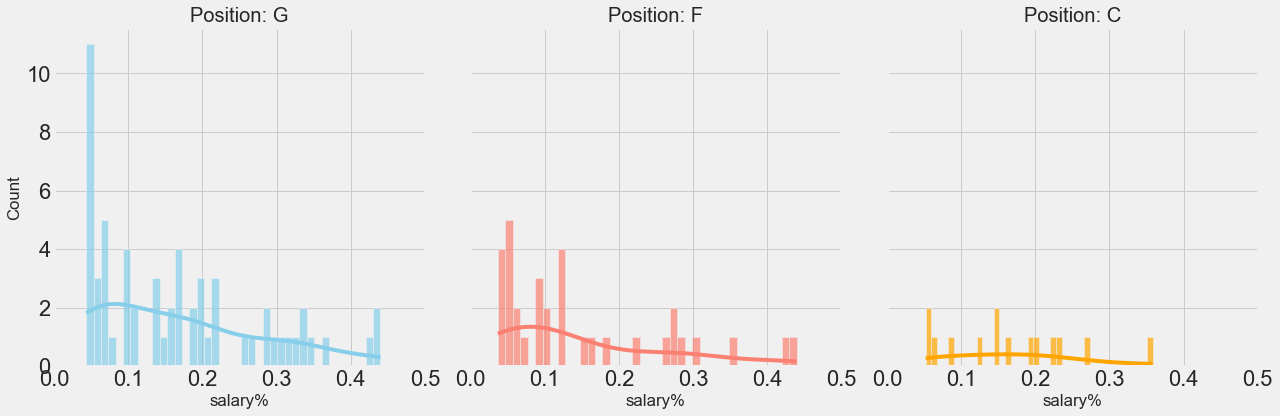

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))

colors = ['skyblue', 'salmon', 'orange']
# iterate over unique positions to create histograms
for i, position in enumerate(salary_data['pos'].unique()):
    pos_data = salary_data[salary_data['pos'] == position]
    
    # plot position average salary
    print(f"{position} mean: {round(pos_data['salary%'].mean(), 2)}")
    print(f"{position} count: {round(pos_data['salary%'].count(), 2)}")
    sns.histplot(pos_data['salary%'], ax=axes[i], bins=40, kde=True, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Position: {position}')
    axes[i].set_xlabel('salary%')
    axes[i].set_xlim(0, 0.5)


plt.tight_layout()
plt.show()

While the scarcity of centers (C) is clear, there does not appear to be a clear relationship between position and salary with mean salaries remaining somewhat consistent across positions.

# Models and Relationships

### Pearson Coefficients and Feature Significance

Now with all of our data, we believe linear regression is suitable for our data as it helps model the relationship between independent variables (player-related factors like points per minute, height, weight, etc.) and the dependent variable (average salary). It allows us to understand how changes in these factors correlate with salary variations.

For our analysis, we used Pearson correlation coefficients as they play a crucial role in determining whether the observed correlations between player-related factors mentioned above and their average salaries are statistically significant. A significant Pearson correlation suggests that the variations in these player-related factors are likely associated with real changes in average salaries. In other words, the observed correlations indicate meaningful relationships between player performance and salary levels and are not merely due to random fluctuations in the data.

In [55]:
from scipy.stats import pearsonr
p_values = {}

# Perform correlation analysis for each variable
for variable in ['gp', 'w', 'l', 'min', 'pts', '3pp', 'tov', 'stl', 'blk', 'height', 'weight', 'usage_rate', 'true_shooting', 'ast_rate']:
    # Extract data for the two variables
    variable_data = data[variable]
    salary_data = data['avg_salary']
    
    # Remove missing values
    variable_data = variable_data.dropna()
    salary_data = salary_data.dropna()
    
    # Calculate Pearson correlation coefficient
    correlation_coefficient, p_value = pearsonr(variable_data, salary_data)
    
    # Print results
    print(f"Pearson correlation coefficient between {variable} and avg_salary: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    
    p_values[variable] = p_value

Pearson correlation coefficient between gp and avg_salary: 0.12903080958973834
P-value: 0.18531290564978078
Pearson correlation coefficient between w and avg_salary: 0.15232142967113954
P-value: 0.11728470887399776
Pearson correlation coefficient between l and avg_salary: 0.0134677041226445
P-value: 0.8904925622877183
Pearson correlation coefficient between min and avg_salary: 0.3315974983016914
P-value: 0.0004847513631612551
Pearson correlation coefficient between pts and avg_salary: 0.3915048283928649
P-value: 3.0472508836500386e-05
Pearson correlation coefficient between 3pp and avg_salary: 0.17437933336305642
P-value: 0.07243131553495856
Pearson correlation coefficient between tov and avg_salary: 0.40912954558918957
P-value: 1.211807129505828e-05
Pearson correlation coefficient between stl and avg_salary: 0.3141899583751886
P-value: 0.0009817405738593821
Pearson correlation coefficient between blk and avg_salary: 0.10213648944086534
P-value: 0.2951736724768246
Pearson correlation c

In [56]:
# Filter variables with p-value less than 0.05
significant_correlations = [variable for variable, p_value in p_values.items() if p_value < 0.05]

# Display significant correlations
significant_correlations

['min', 'pts', 'tov', 'stl', 'true_shooting', 'ast_rate']

We just found out, that the variables ['min', 'pts', 'tov', 'stl', 'true_shooting', 'ast_rate'] have statistically significant correlations with the average salary of WNBA players. In other words, changes in these player-related factors are associated with variations in the average salary.

### Preprocessing

As we have categorical variables, we'll need to use one hot encoding to convert this data into usable features for our models. Then we'll create a feature set using these one hot encoded values and the continuous, rate-adjusted features we used in previous sections.

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [58]:
# One hot encoding for categorical variables (position, free agent type)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[['pos', 'fa_type']])

encoded = pd.DataFrame(enc.transform(data[['pos', 'fa_type']]).toarray())
encoded.columns = enc.get_feature_names_out()

In [59]:
x_cols = ['pts_min', 'ast_rate', 'tov_per_sec', 'blk_per_sec', 'win_rate', '3pp', 'min', 'height', 'weight', 'true_shooting', 'usage_rate']
X_continuous = data[x_cols].reset_index(drop=True)

# handle divide by zero errors with rate statistics
X_continuous = X_continuous.fillna(0)

# Combine encoded with continuous variables
X = pd.concat([X_continuous, encoded], axis=1)
y = data['avg_salary']

In [60]:
# Divide into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=53)

In [61]:
X_train

,pts_min,ast_rate,tov_per_sec,blk_per_sec,win_rate,3pp,min,height,weight,true_shooting,usage_rate,pos_C,pos_F,pos_G,fa_type_RFA,fa_type_UFA
24,0.331301,21.2,0.000949,0.000068,0.818182,38.5,492.0,69.0,137.0,58.4,14.7,0.0,0.0,1.0,0.0,1.0
7,0.452191,11.3,0.001428,0.000100,0.588235,30.6,502.0,73.0,155.0,48.3,22.5,0.0,0.0,1.0,0.0,1.0
42,0.302405,12.3,0.001031,0.000286,0.444444,33.3,291.0,75.0,170.0,42.6,17.3,0.0,0.0,1.0,0.0,1.0
105,0.298165,23.4,0.001911,0.000000,0.363636,36.1,218.0,67.0,130.0,56.0,15.5,0.0,0.0,1.0,0.0,1.0
17,0.450000,6.3,0.000833,0.000000,0.333333,0.0,20.0,76.0,195.0,78.1,14.9,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,0.498092,8.4,0.000700,0.000191,0.350000,35.2,524.0,72.0,167.0,58.1,20.0,0.0,0.0,1.0,1.0,0.0
61,0.327950,6.4,0.000932,0.000787,0.375000,41.7,805.0,73.0,182.0,55.7,15.8,0.0,1.0,0.0,0.0,1.0
37,0.382500,13.2,0.000875,0.000333,0.571429,43.1,400.0,69.0,140.0,55.8,17.2,0.0,0.0,1.0,0.0,1.0
29,0.355932,15.3,0.001695,0.000816,0.095238,34.0,531.0,77.0,184.0,47.3,20.6,1.0,0.0,0.0,0.0,1.0


### Baseline

To establish a baseline model, we'll simply predict the mean of the training dataset. With this baseline, we can better understand how well our other models are performing. We'll use root mean squared error for evaluation as it provides a slightly more interpretable response compared to mean squared error.

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
train_mean = y_train.mean()

train_err = mean_squared_error(y_train, [train_mean]*len(y_train))**(1/2)
test_err = mean_squared_error(y_test, [train_mean]*len(y_test))**(1/2)

print(f'Training RMSE: {train_err:.3}')
print(f'Test RMSE: {test_err:.3}')

Training RMSE: 1.39e+05
Test RMSE: 1.64e+05


### Linear Regression

Next we'll fit a simple linear regression with no regularization.

In [64]:
from sklearn import linear_model

In [65]:
# Train Model
lin_mdl = linear_model.LinearRegression()
lin_mdl.fit(X_train, y_train)

LinearRegression()

In [66]:
# Get train and test error
train_pred = lin_mdl.predict(X_train)
test_pred = lin_mdl.predict(X_test)

# Get root mean squared error
train_err = mean_squared_error(y_train, train_pred)**(1/2)
test_err = mean_squared_error(y_test, test_pred)**(1/2)

print(f'Training RMSE: {train_err:.3}')
print(f'Test RMSE: {test_err:.3}')

Training RMSE: 1.16e+05
Test RMSE: 2.76e+05


Without considering regularization parameters, we've encountered issues with overfitting; our training RMSE is 1.16e5 compared to a test RMSE over twice that.

### Ridge Regression

In order to prevent overfitting, we also fitted a ridge regression model (a linear regression with an L2 regularization parameter). The L2 (alpha) parameter punishes the model for incoporating large weights, therefore balancing the coefficients of the model and countering overfitting to some degree.

In [67]:
# Train Model
ridge_mdl = linear_model.Ridge(alpha=1e3)
ridge_mdl.fit(X_train, y_train)

Ridge(alpha=1000.0)

In [68]:
# Get train and test error
train_pred = ridge_mdl.predict(X_train)
test_pred = ridge_mdl.predict(X_test)

# Get root mean squared error
train_err = mean_squared_error(y_train, train_pred)**(1/2)
test_err = mean_squared_error(y_test, test_pred)**(1/2)

print(f'Training RMSE: {train_err:.3}')
print(f'Test RMSE: {test_err:.3}')

Training RMSE: 1.25e+05
Test RMSE: 1.55e+05


With the addition of a regularization parameter, our overfitting closer resembles the baseline model with roughly a 3e4 (30,000) difference. The ridge regression model performed slightly better than the baseline model on both training and test data and significantly better than the basic linear regression on test data.

### Gradient Boosting Ensemble

Next we'll emply a more complex gradient boosting model. Gradient boosting is an ensemble technique wherein some models are designed to predict the errors of others. In this case, we're using tree models, which do have a tendency to overfit. To account for this, we've added several regularization parameters to attempt to limit overfitting.

- `learning_rate`: as with other models, this represents the "step size" of the gradient descent. So a smaller learning rate will result in a model learning more slowly but potentially more accurately.
- `max_depth`: for each indivudual tree in the ensemble, the tree's height cannot exceed this value.
- `min_weight_fraction_leaf`: sets a threshold for whether to split a node. If the fraction of data falls below this value, the node will not split.

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
# Model parameters
params = {
    "learning_rate": 0.01,
    "max_depth": 4,
    "min_weight_fraction_leaf": 0.1,
    "random_state": 53,
}

# Train Model
grad_mdl = GradientBoostingRegressor(**params)
grad_mdl.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                          min_weight_fraction_leaf=0.1, random_state=53)

In [71]:
# Get train and test error
train_pred = grad_mdl.predict(X_train)
test_pred = grad_mdl.predict(X_test)

# Get root mean squared error
train_err = mean_squared_error(y_train, train_pred)**(1/2)
test_err = mean_squared_error(y_test, test_pred)**(1/2)

print(f'Training RMSE: {train_err:.3}')
print(f'Test RMSE: {test_err:.3}')

Training RMSE: 9.74e+04
Test RMSE: 1.47e+05


Again, this model struggled with overfitting but still outperformed all other models on the test set with a test RMSE of 1.47e5.

(50000.0, 600000.0)

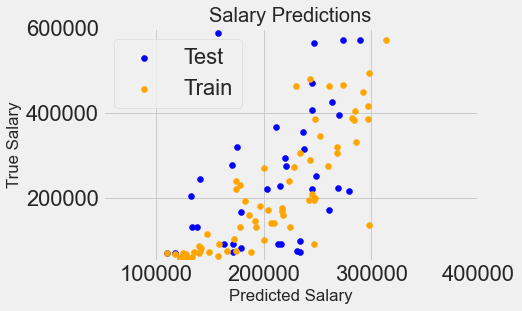

In [72]:
plt.scatter(test_pred, y_test, c='blue', label='Test')
plt.scatter(train_pred, y_train, c='orange', label='Train')
plt.title('Salary Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('True Salary')
plt.legend()
plt.xlim(50_000, 400_000)
plt.ylim(50_000, 600_000)

The model could clearly establish a relationship between the feature set but was fairly conservative with predictions. The model never predicted salary above 350,000 or below 100,000.

# Ethics & Privacy

We understand the importance of upholding ethical standards throughout our research project. To ensure ethical conduct, we have implemented specific measures across the data science process. We carefully source our data from the official WNBA website and reputable sources, focusing solely on the WNBA to avoid potential biases originating from mixed datasets. We ensure a fair representation of diverse groups in the data underpins our research approach, with the ultimate goal of generating valuable and inclusive outcomes. 

Additionally, we introduce various constraints during data collection and analysis to minimize potential biases that may arise from comparisons between dissimilar situations. To address biases effectively, we will thoroughly scrutinize the data by consistently evaluating variables that could introduce bias at every stage of our research. A potential bias that we thought could arise was the differences between rookie contracts versus regular contracts. Rookie contracts tend to have lower pay compared to regular contracts, and as a result, we could accidentally draw a positive correlation between age and player contracts. To mitigate this factor, we plan to separate rookie contracts from our data set to improve the correlation between biological factors and player salaries. Based on our findings, we will omit and separate data that does not fall under our original hypothesis and that can accidentally skew our data to create a false correlation.

Moreover, an ethical concern that might arise is the potential adverse impact on the market value of WNBA players. Our analysis aims to predict the market value expectations for these athletes; however, there exists a risk that our predictions, based on the features and data considered, may inadvertently underestimate their true market value. This oversight could arise from factors we did not incorporate into our analysis. If WNBA teams were to take advantage of our research findings, there is a possibility they might offer contracts that fall short of the players' actual earning potential. Such a scenario could result in players receiving compensation below what they could have negotiated based on unaccounted-for variables. Addressing this ethical concern is imperative to ensure that our research serves as a valuable tool without inadvertently causing a negative impact on the WNBA players we seek to analyze.

Nevertheless, we’ll remain vigilant in detecting and mitigating any possible biases by experimenting with different data subsets and comparisons of results. Regarding data privacy, we acknowledge the use of some personal data of WNBA players, which, while not sensitive, could have unforeseen implications. Therefore, we’ll exercise caution and closely monitor the research process to prevent any unintended consequences and to uphold privacy standards. Lastly, we will remain open to making any necessary adjustments to our project in response to any ethical or privacy concerns that may arise. In all aspects of our research, we’ll remain dedicated to conducting the project responsibly, ethically, and with equitable impact in mind.


# Discusison and Conclusion

Overall, we had a quite successful analysis coming in. However, our results are limited by the small number of data sets that are available to us, due to that additional datasets require extra revenue to secure. Therefore, our conclusion might be overestimating or underestimating the effect of the significant variables that we got. In our project, we started webscraping datasets from sportrac.com and stats.wnba.com. From stats.wnba.com, we obtained different attributes about a player and from sportrac.com, we obtained distinct salaries from each player. To clean our datasets, we did transformation of different strings and standardized the value from the datasets. We then went through and merged two datasets together to get our final datasets, in which contains players' salaries as well as their attributes. However, due to we have too much attributes and we did not have the time resources to help us analyze all of the attributes and check their correlations, we used our sense to pick out varaiables that should have an effect on players' salaries. However, this also means we may have introduced confirmation bias to our data. 

After we have handpicked our data, we went through our EDA analysis with a goal of getting a sense of the relationship between each attributes with players' salaries. Our EDA process is done by first graphing the attributes using an histogram and check its distribution; then we eliminated any outliers from the data and dropped data with player that had too little game played, which help us to get a true generalization of the distribution of the data that we are dealing with. From there, we redrawn the histogram with separating attributes base on different position that player plays; this helps us to see if there is a sysmatic difference in the attributes across different roles, if so, we want assess that variable together with difference in roles; Lastly, we plotted a scatter plot between the attributes and player's average salary to see if the variable has a general relationship with the player's salary. We have also followed the same process with the salary and see if there is a sysmatic difference in salary across all roles and we were led to the conclusion that there is not a significant difference in salary across all roles.

Lastly, with the help of our EDA process, we used a simple linear regression with our picked attributes and test them against a 5% significance level to find our significant attributes. With our linear regression, we obtained minutes played, amount of points a player scored, turn-over-rate, steal rate, true-shooting-rate and assists rate are significant attributes that affect a players' salary. With our picked significant variables, we went ahead and used several models to see how well we can predict a players' salary with our picked significant variables and used RMSE as our indicator to test how well a model performs. We first created a base-line model, in which the model simply predicted the mean of our training-set. The purpose of the model is to help us to understand our accuracy with our other models. The first model we used is a linear regression model. However, with this model, we encountered overfitting, thus to counter overfitting, we chose a ridge regression model, in which model balances the weight on the coeefficient and smooth out the model to avoid overfitting. Our ridge regression model also performed way better than our base-line model as well as linear regression model. However, we want to see is there a model that can perform even better than the ridge model. Therefore, we created a gradiant boosting ensemble, model, with regularization parameters to avoid overfitting. Even though the model had overfitting issues, it still outperformed other models in the test set's RMSE, and by graphing the training set and the test set, we could see that the model could eastablish a clear relationship between our significant features.

Overall, we conclude that the most important trait to players' salary in WNBA are minutes played, amount of points a player scored, turn-over-rate, steal rate, true-shooting-rate and assists rate. However, correlation doesn't always mean causation, and the true effect of those variables still need to be assessed due to our limitations with the number of datasets.



# Team Contributions

David Zhuo - project timeline proposal, Wnbastats data, player traits eda (win rate, pts per min), video (conclusion), discussion and conclusion

David Wang - ethics and privacy, ethics and privacy corrections, player traits eda (3 pt percentage, true shooting, ast_rate), video (section start to data), video (intro to data)

Sebastian Finch - data proposal, hypothesis, Spotrac data, salary eda, models other than regression model, analysis of regression model, video (analysis of regression pt. 2)

Jonathan Yip - background and prior work, background and prior work corrections, ethics and privacy corrections,  player traits eda (height, weight, usage_rate), video (eda)

James Streett - data proposal, background and prior work corrections, player traits eda (tov per min, stl per min, blk per min), regression model, video (analysis of regression pt. 1)